In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
def autolabel(rects):
    """Attach a text label above each bar , displaying its height."""
    for rect in rects:
        height = rect.get_height()
        #plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom') 
        plt.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 7),  # 4 points vertical offset
                    textcoords="offset points",
                    ha='center', size = 15, color='black')

In [3]:
def autolabel_line(xs, ys):
    for x,y in zip(xs,ys):
        label = "{:.2f}".format(y)
        plt.annotate(label, # this is the text
                 (x,y), # this is the point to label,    
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', size = 14, color='black') # horizontal alignment can be left, right or center

In [4]:
def change_width(ax, new_value, bar) :
    for patch in bar.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

In [5]:
def pct_change_inc(data):
    d = []
    for i in range(len(data)):
        if i == 0:
            d.append(data[i]/data[i])
        else:
            d.append(((data[i]-data[i-1])/data[i-1] * 100).round(1))
    return d 
    
def pct_change_dec(data):
    d = []
    for i in range(len(data)):
        if i == 0:
            d.append(data[i]/data[i])
        else:
            d.append(((data[i-1]-data[i])/data[i-1] * 100).round(1))
    return d 
    

3.1.1 Maternal Mortality Rate
    Year  Progress  pct_change
1   2002       264         7.7
2   2003       254         3.8
3   2004       243         4.3
4   2005       237         2.5
5   2006       276       -16.5
6   2007       214        22.5
7   2008       205         4.2
8   2009       199         2.9
9   2010       191         4.0
10  2011       180         5.8
11  2012       173         3.9
12  2013       166         4.0
13  2014       161         3.0
14  2015       154         4.3
15  2016       143         7.1
16  2017       140         2.1
17  2019       186       -32.9
3.1.2 Skill Birth Rate
    Year  Progress  pct_change
1   2004        36        56.5
2   2005        48        33.3
3   2006        39       -18.8
4   2007        40         2.6
5   2008        41         2.5
6   2010        43         4.9
7   2011        51        18.6
8   2012        52         2.0
9   2013        58        11.5
10  2014        59         1.7
11  2017        69        16.9
12  2018        7

<ipython-input-5-2f3ea20a549f>:5: RuntimeWarning: invalid value encountered in longlong_scalars
  d.append(data[i]/data[i])
<ipython-input-5-2f3ea20a549f>:7: RuntimeWarning: divide by zero encountered in longlong_scalars
  d.append(((data[i]-data[i-1])/data[i-1] * 100).round(1))
<ipython-input-10-84a101614796>:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax2 = plt2.subplots(figsize=(20, 10))


2.2.4 Save Sanitation
    Year  Progress  pct_change
1   2005        60        11.1
2   2006        58        -3.3
3   2007        66        13.8
4   2008        63        -4.5
5   2010        66         4.8
6   2011        72         9.1
7   2012        71        -1.4
8   2013        74         4.2
9   2014        73        -1.4
10  2018        70        -4.1
2.4.1 Hospital Beds Threshold
    Year  Progress  pct_change
1   2002       6.9         0.0
2   2003       6.8        -1.4
3   2004       6.8         0.0
4   2005       7.0         2.9
5   2006      12.5        78.6
6   2007      10.0       -20.0
7   2008       6.0       -40.0
8   2009       6.0         0.0
9   2010       6.0         0.0
10  2011       6.0         0.0
11  2012       6.0         0.0
12  2013       6.0         0.0
2.4.3 Physicians
    Year  Progress  pct_change
1   2001      0.66         1.5
2   2004      0.74        12.1
3   2005      0.79         6.8
4   2007      0.76        -3.8
5   2008      0.78         2.6
6

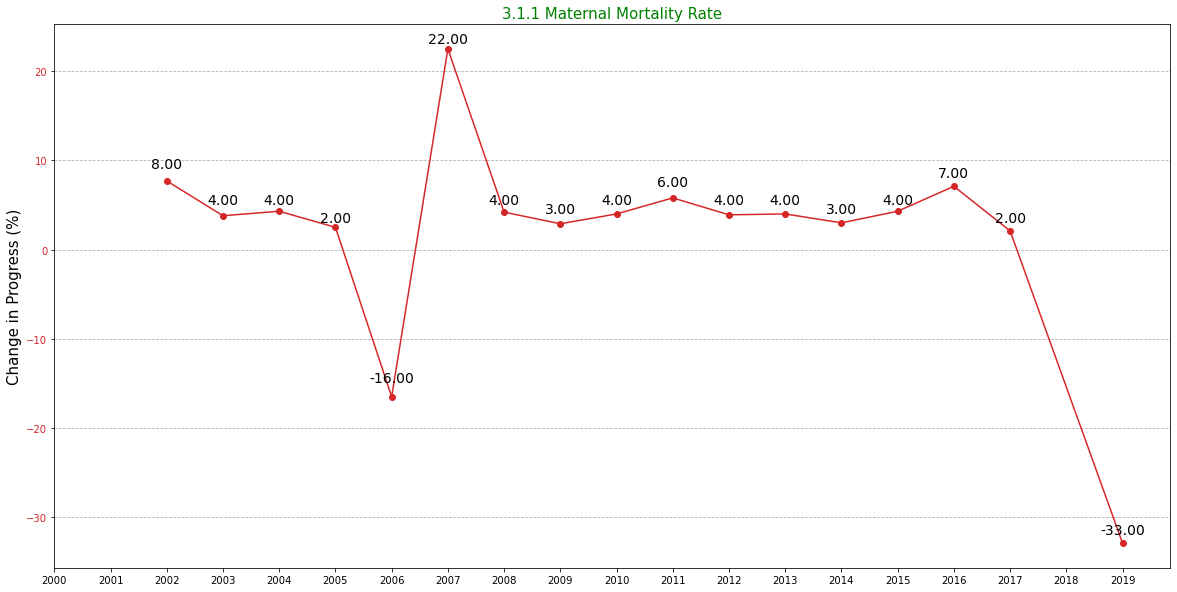

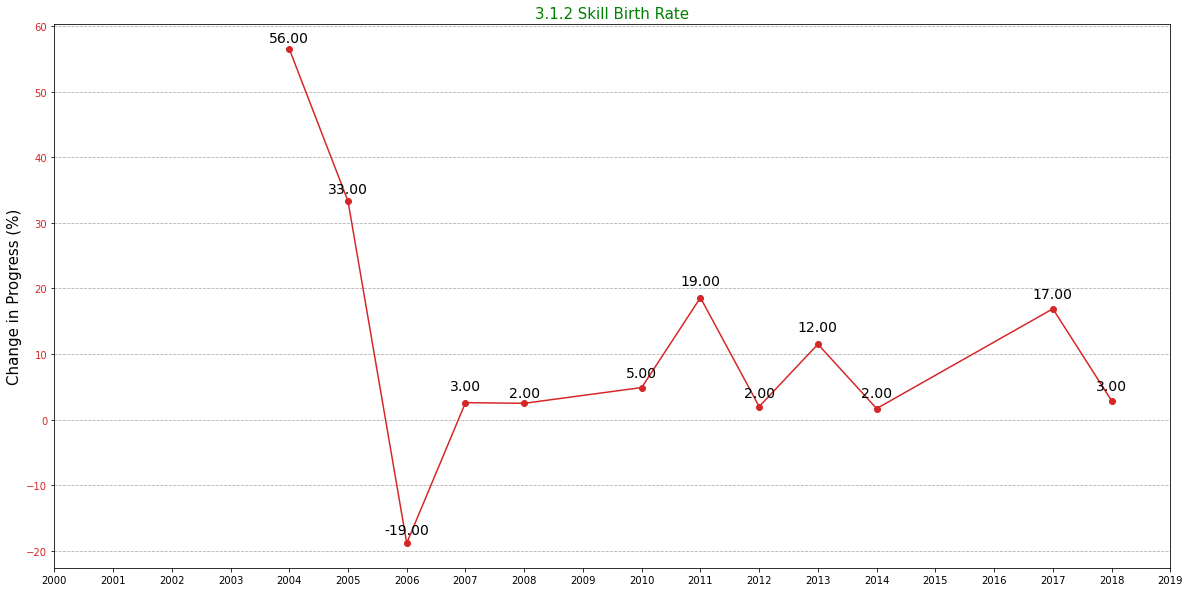

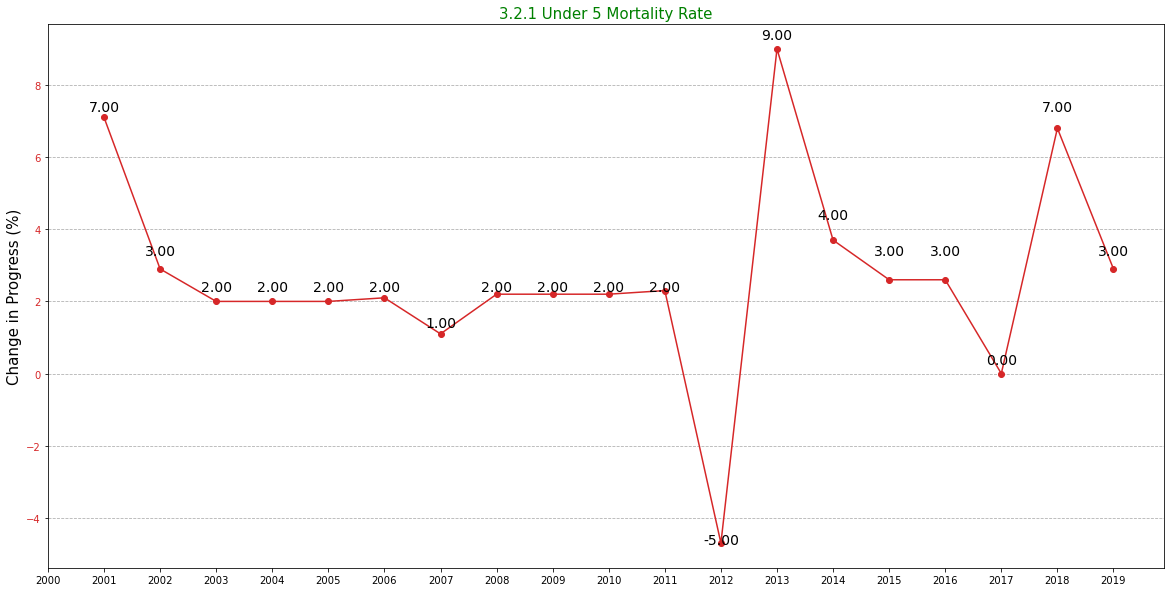

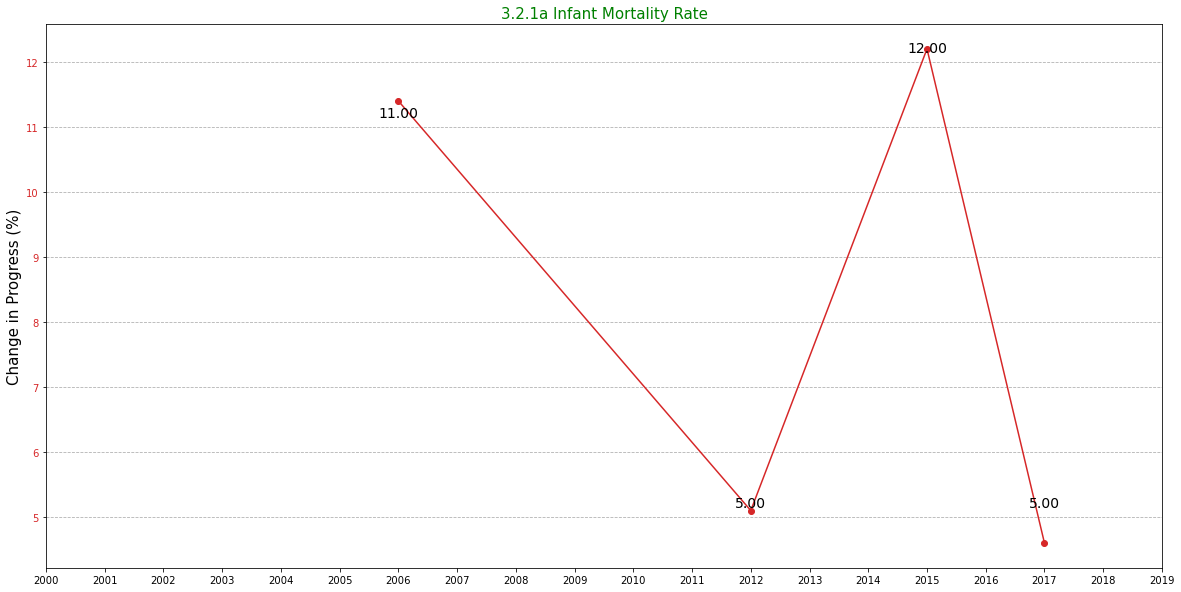

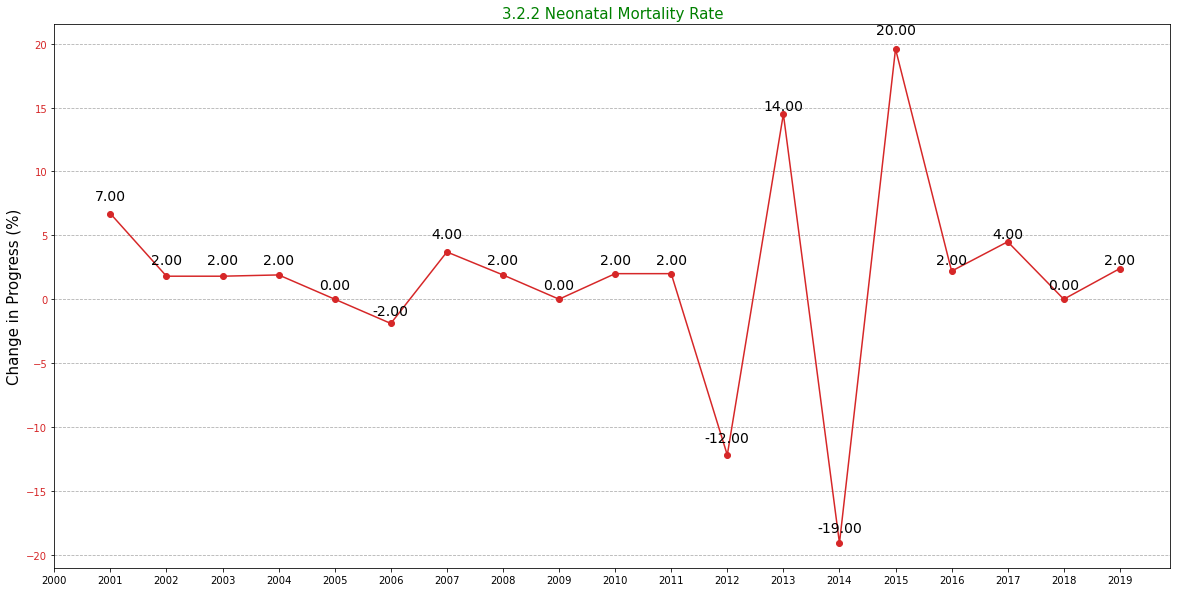

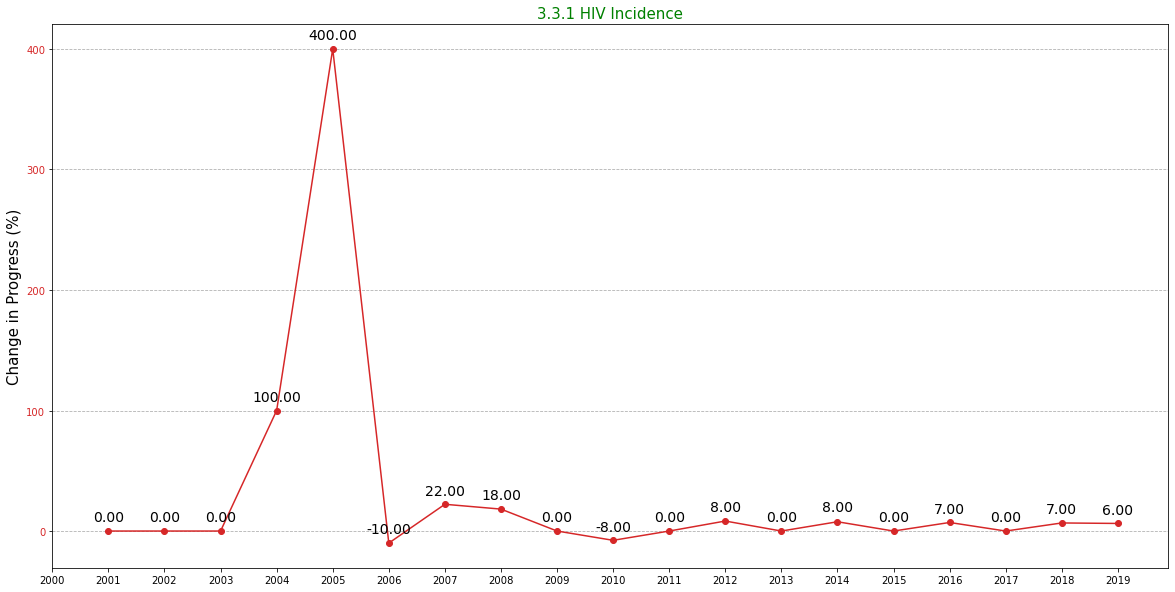

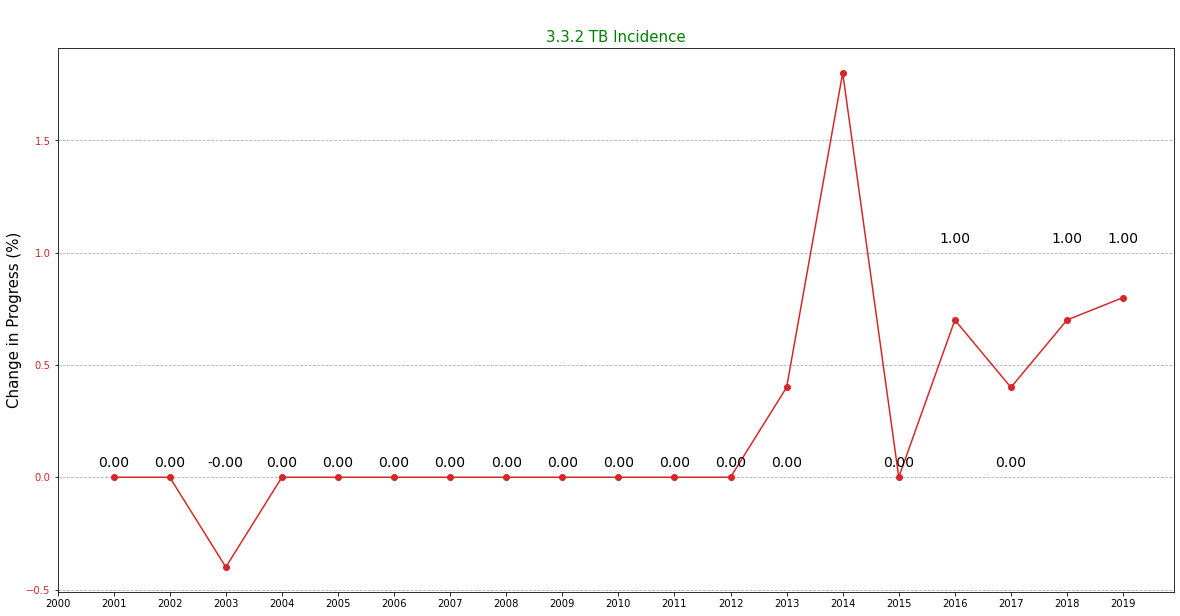

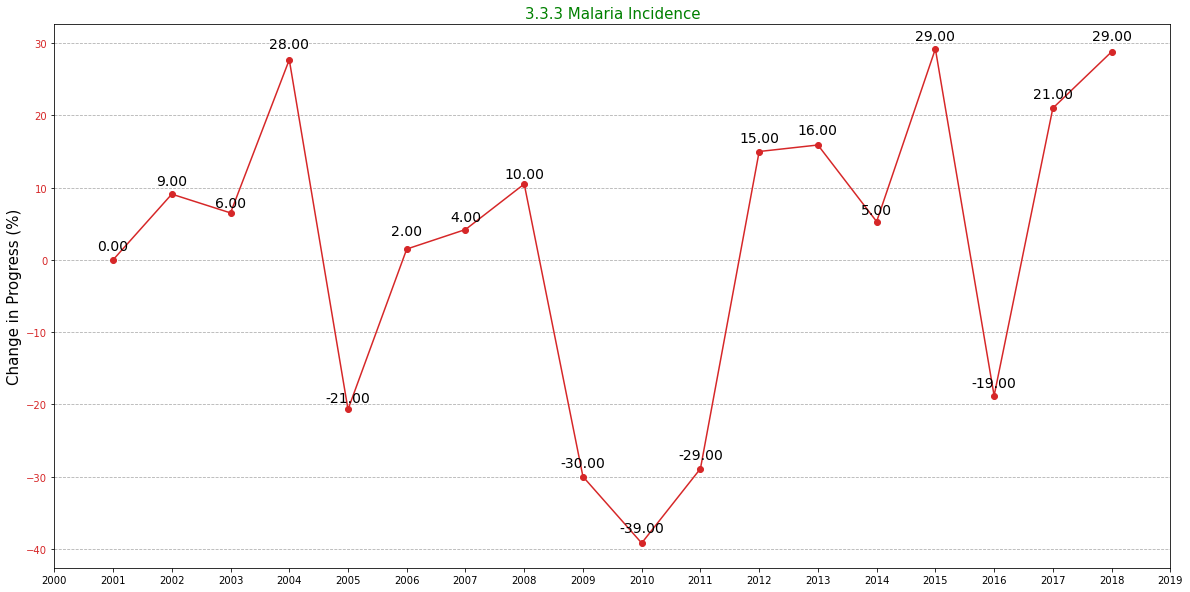

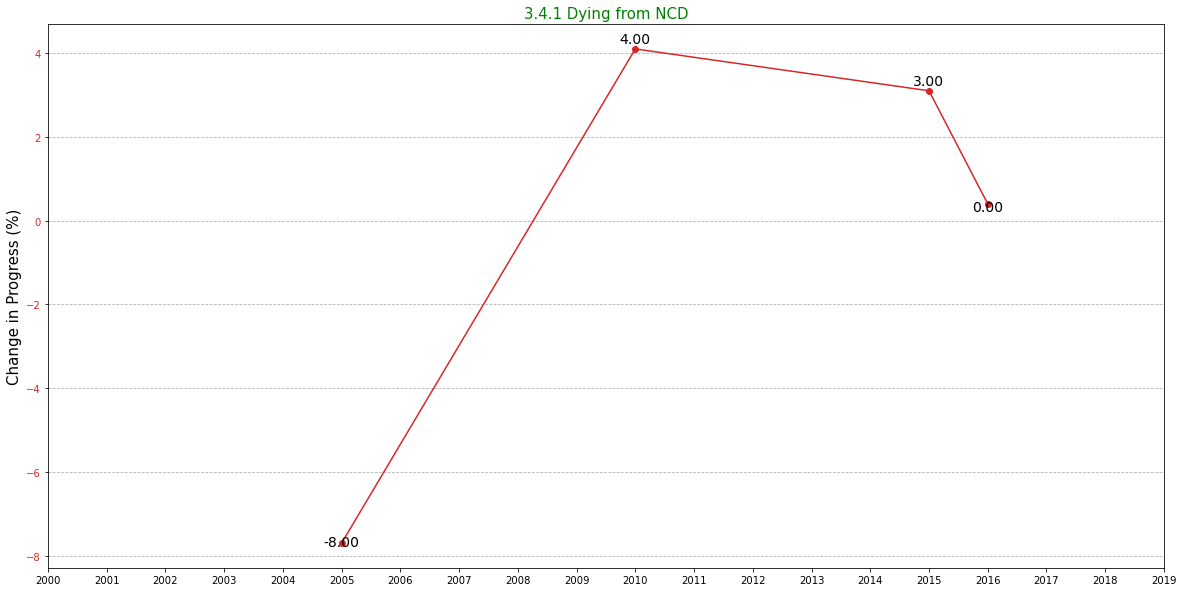

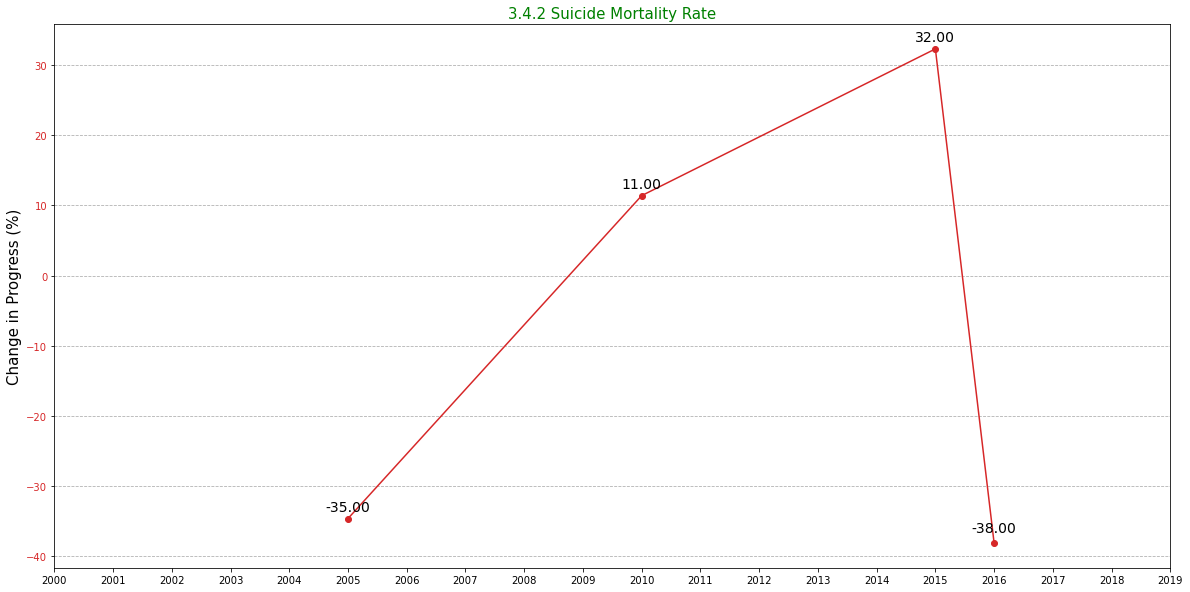

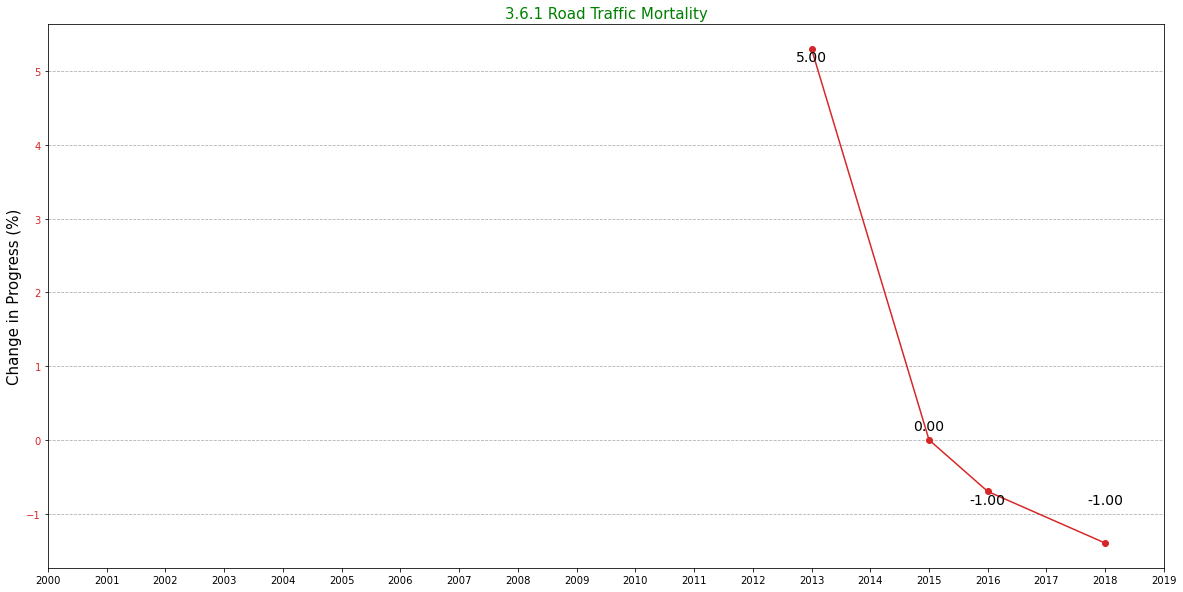

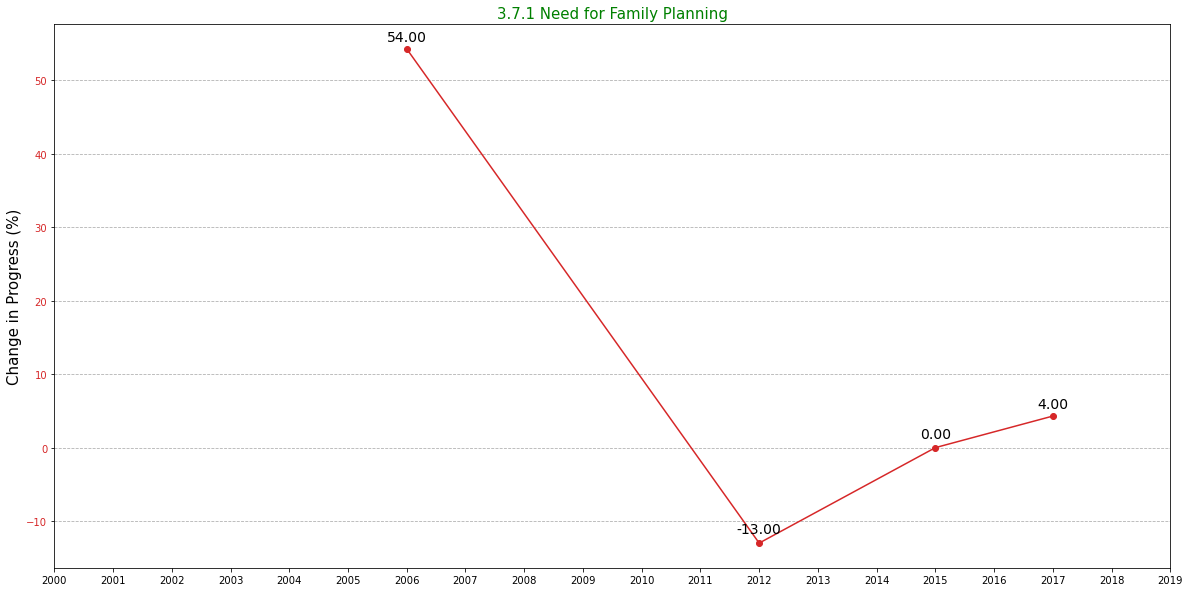

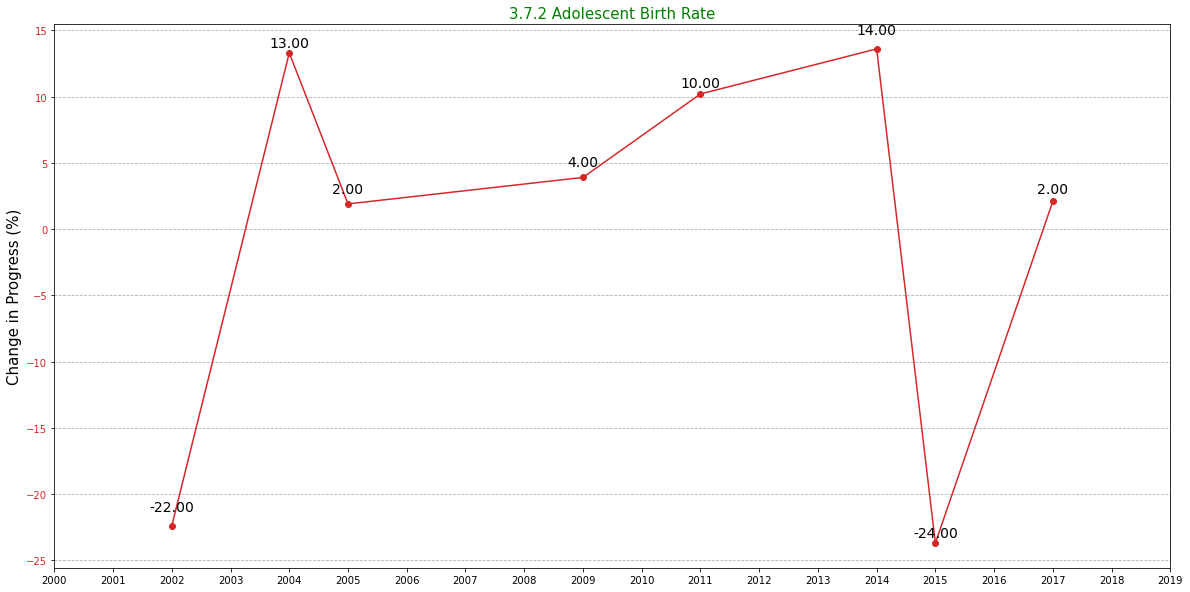

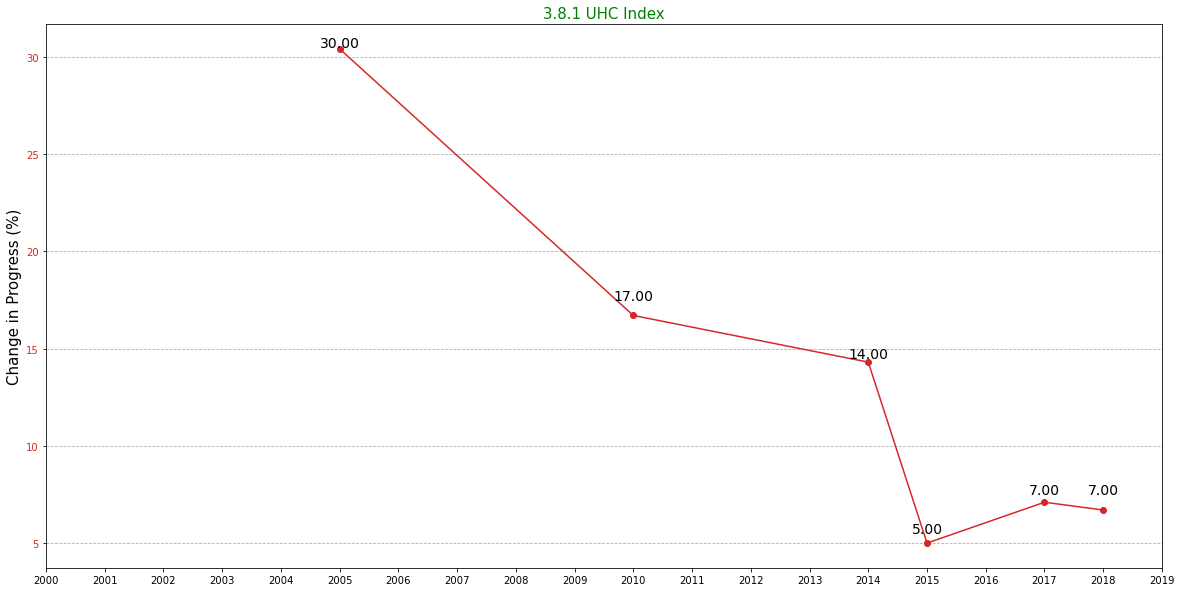

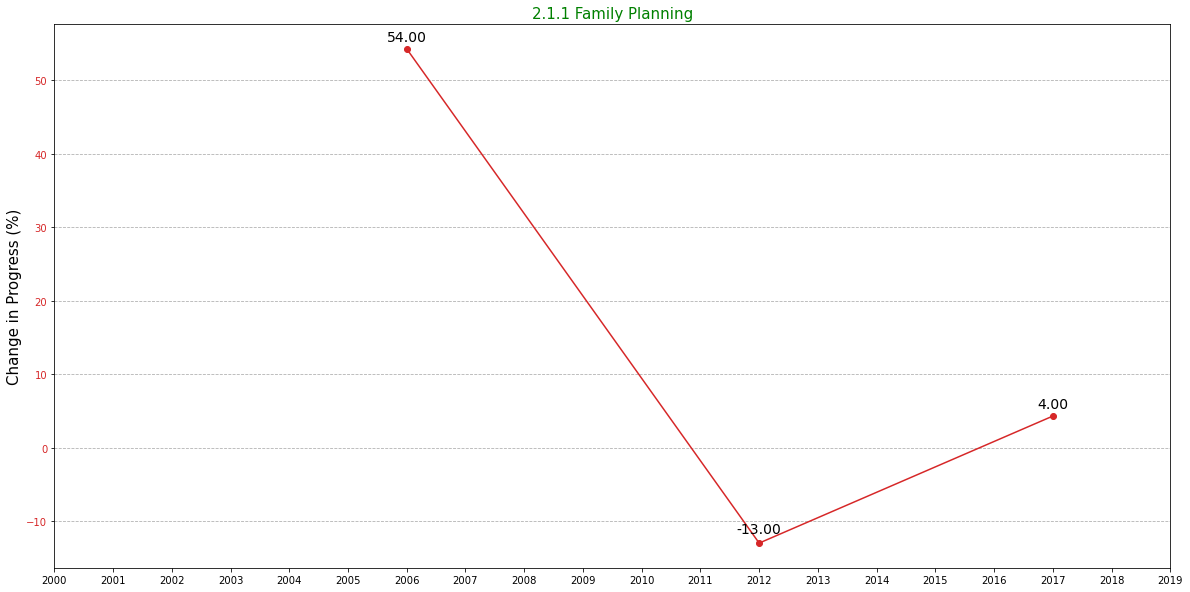

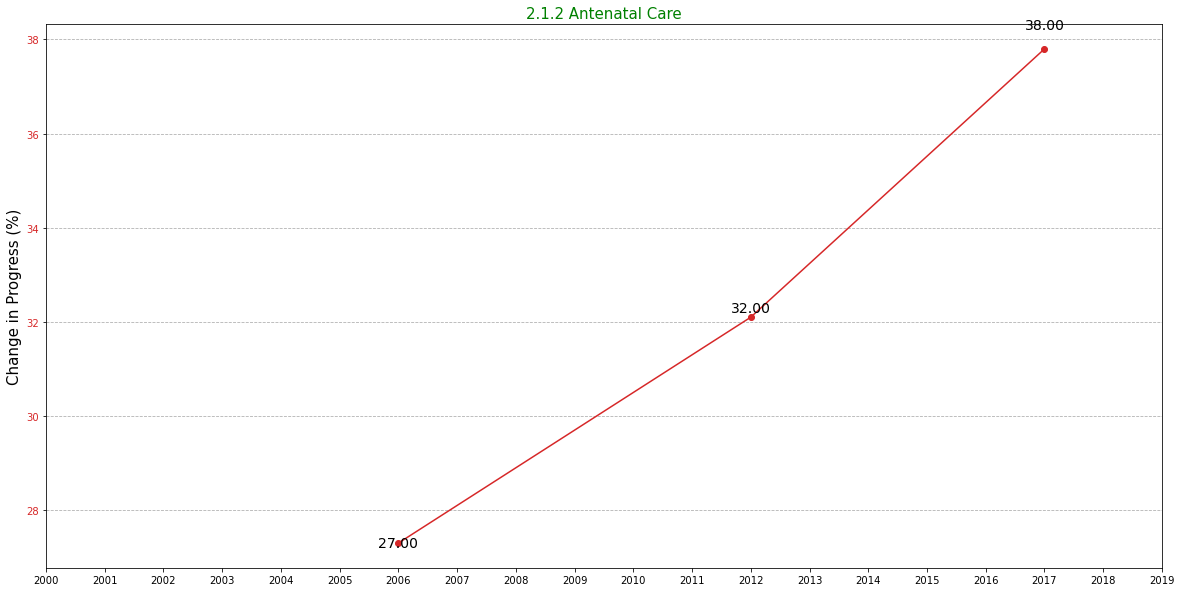

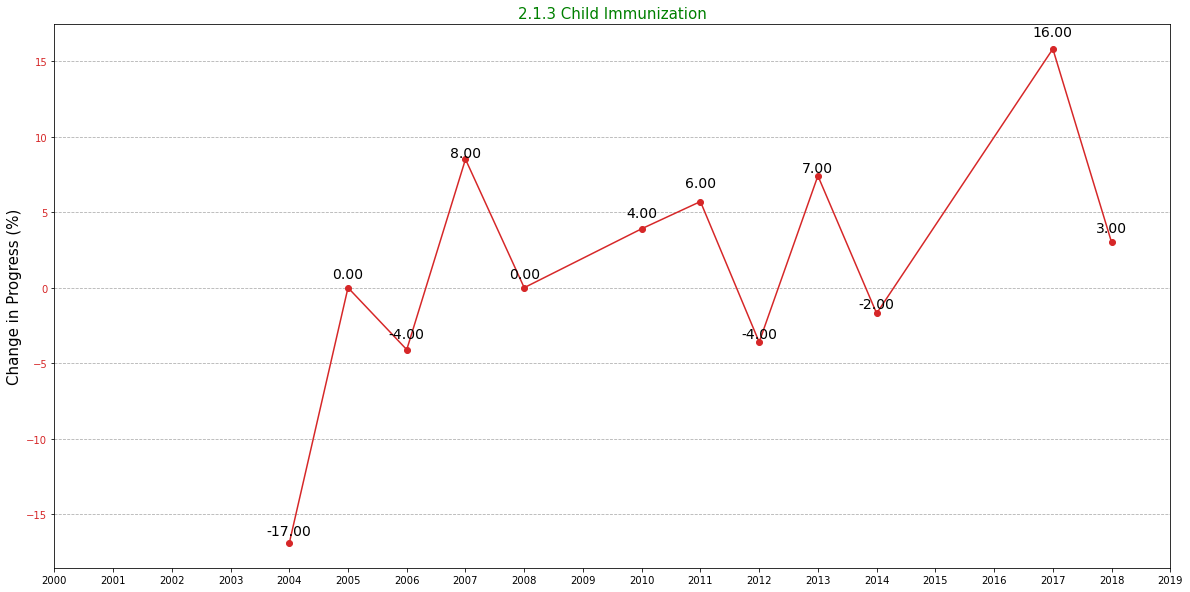

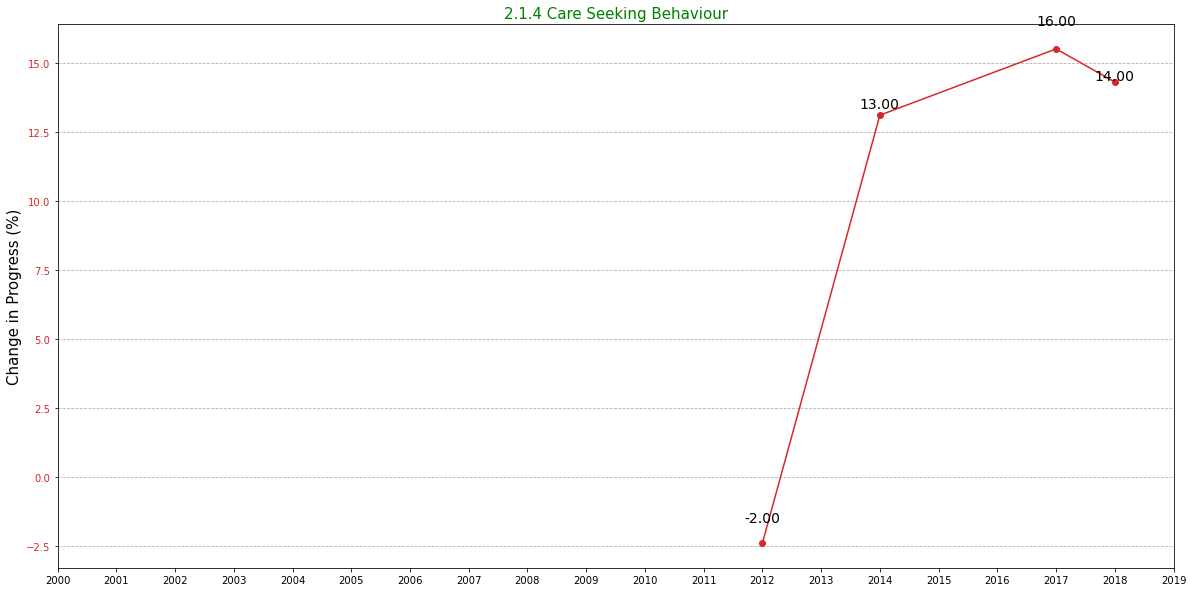

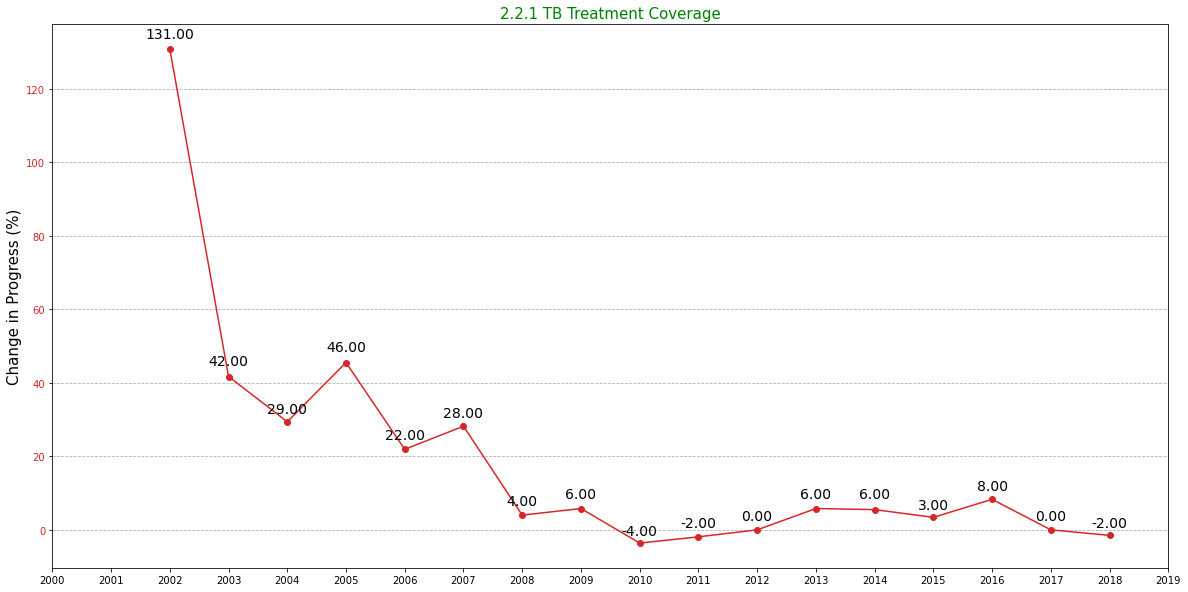

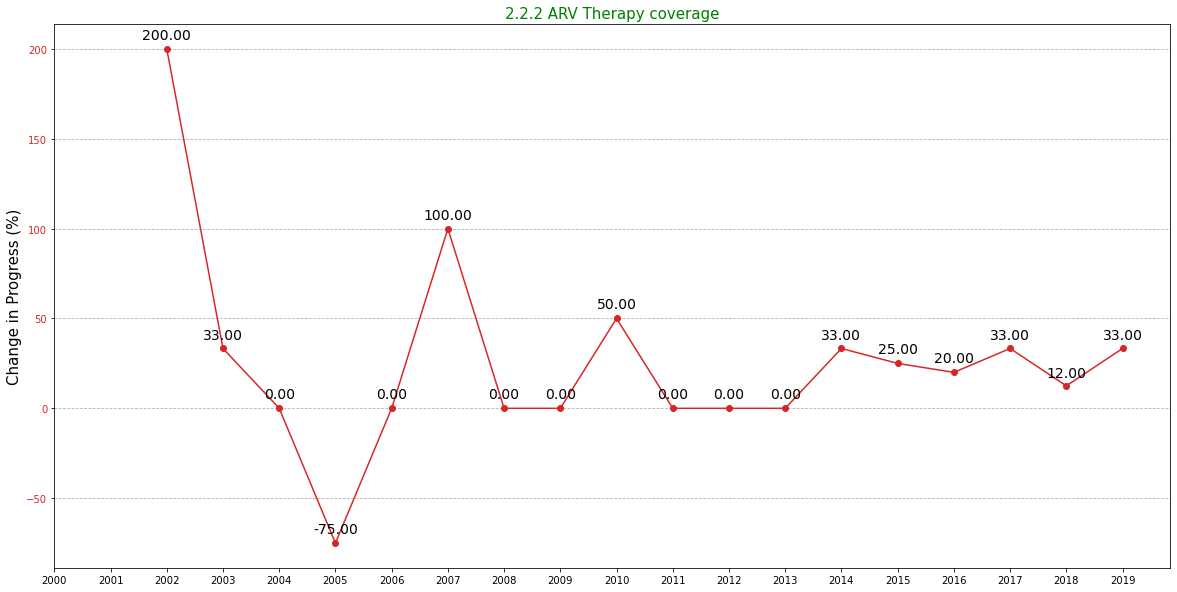

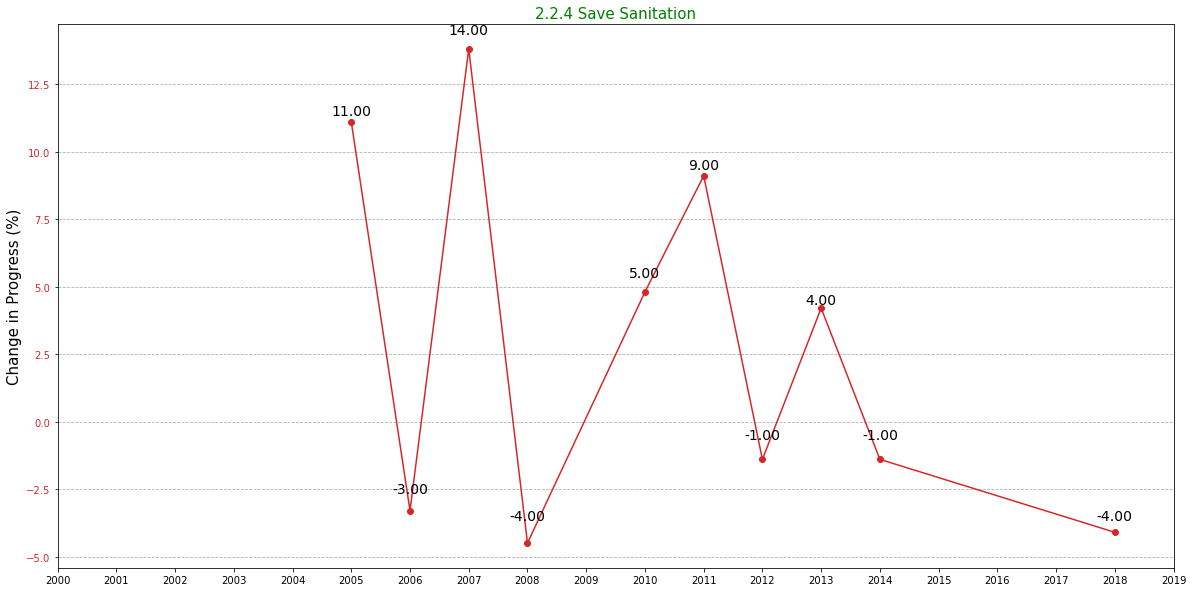

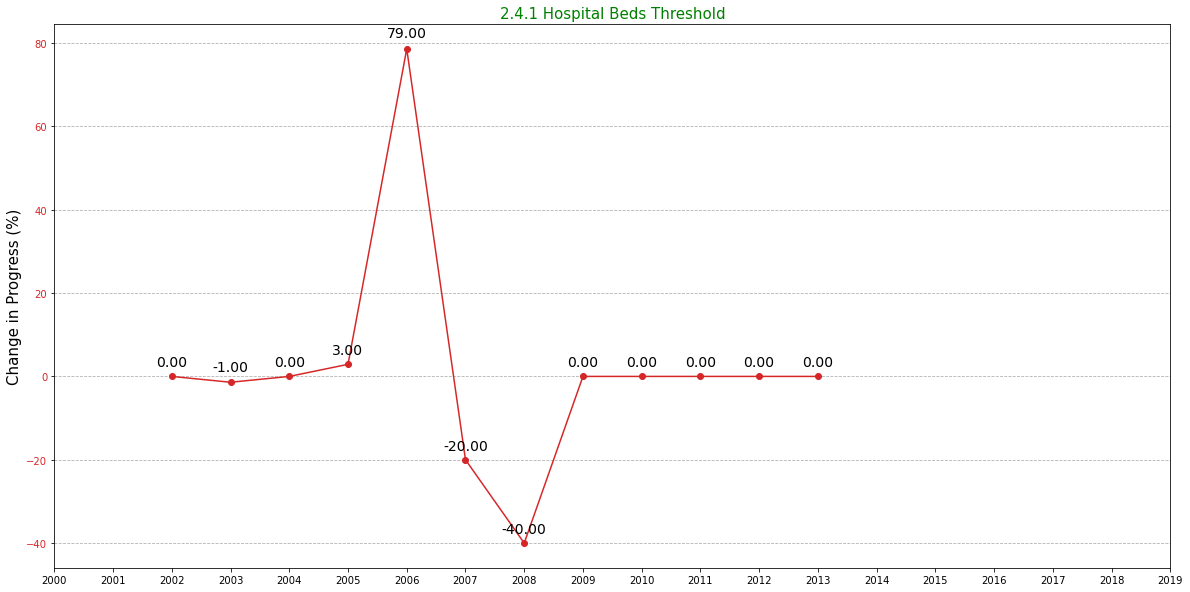

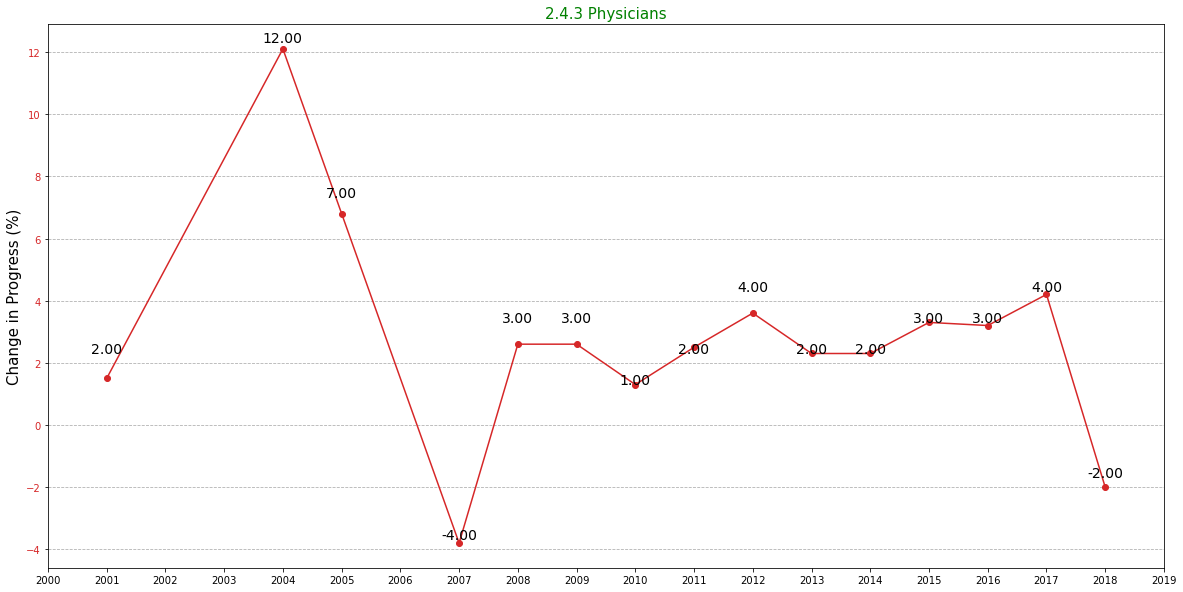

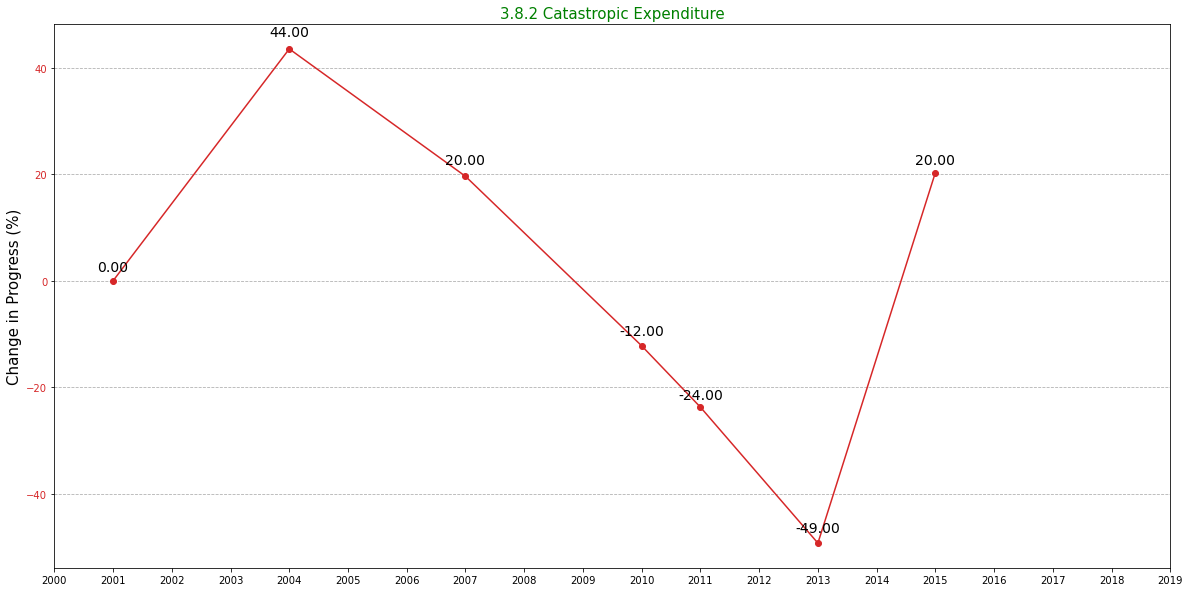

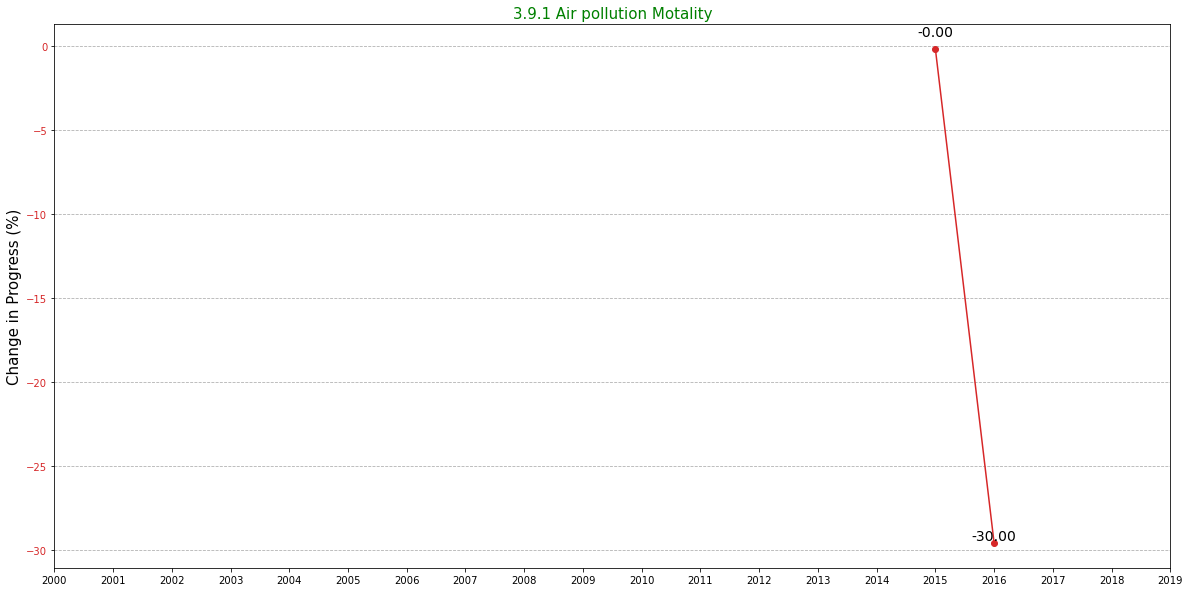

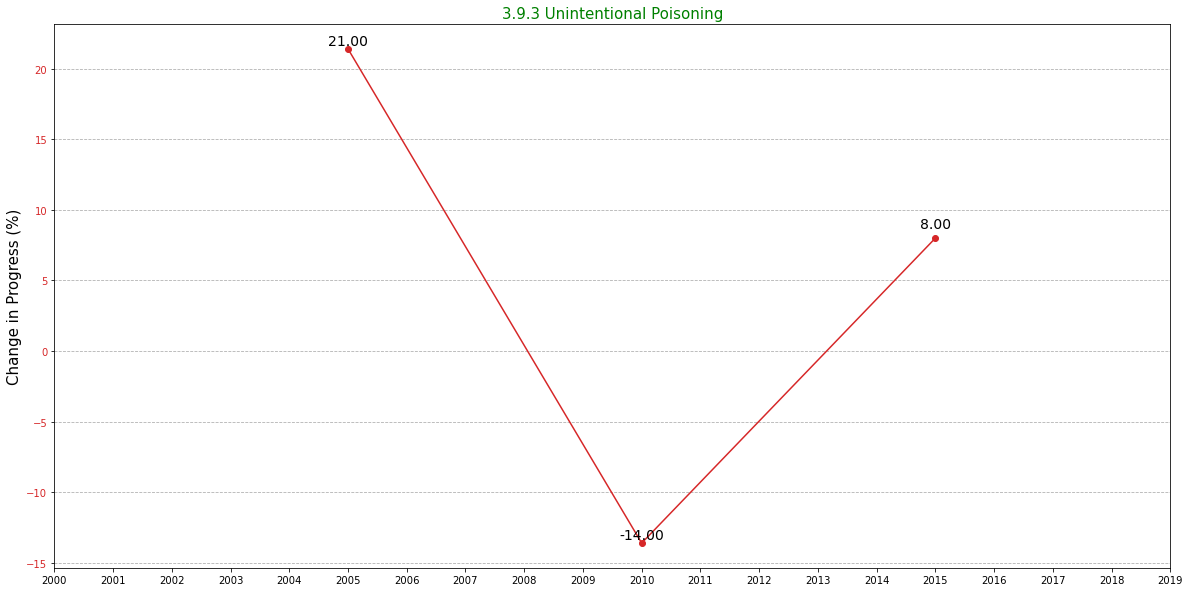

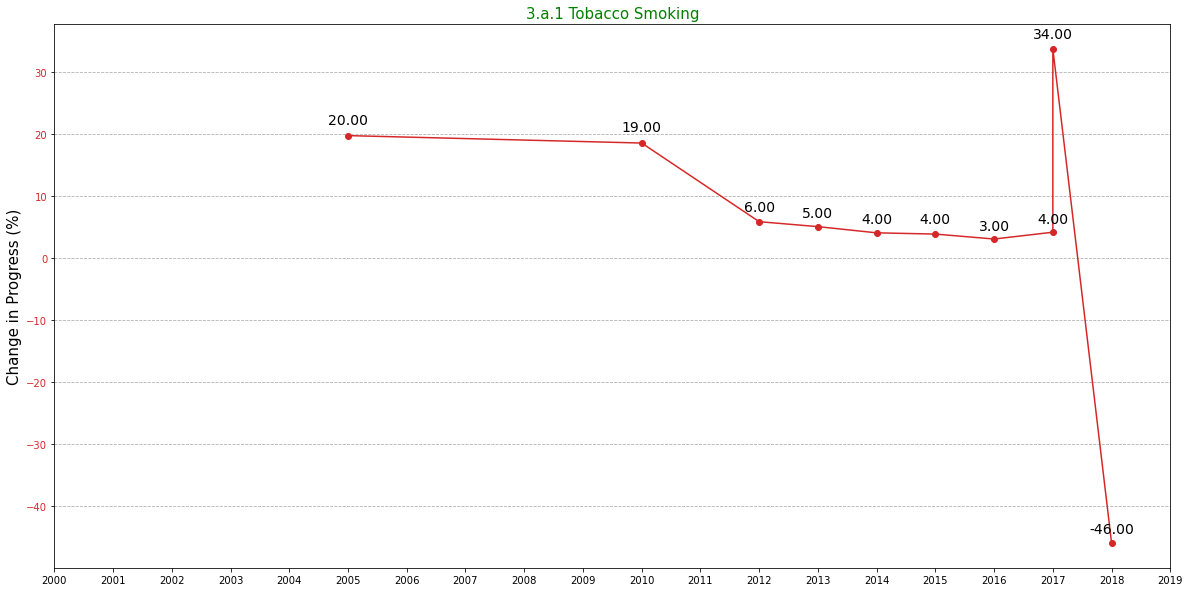

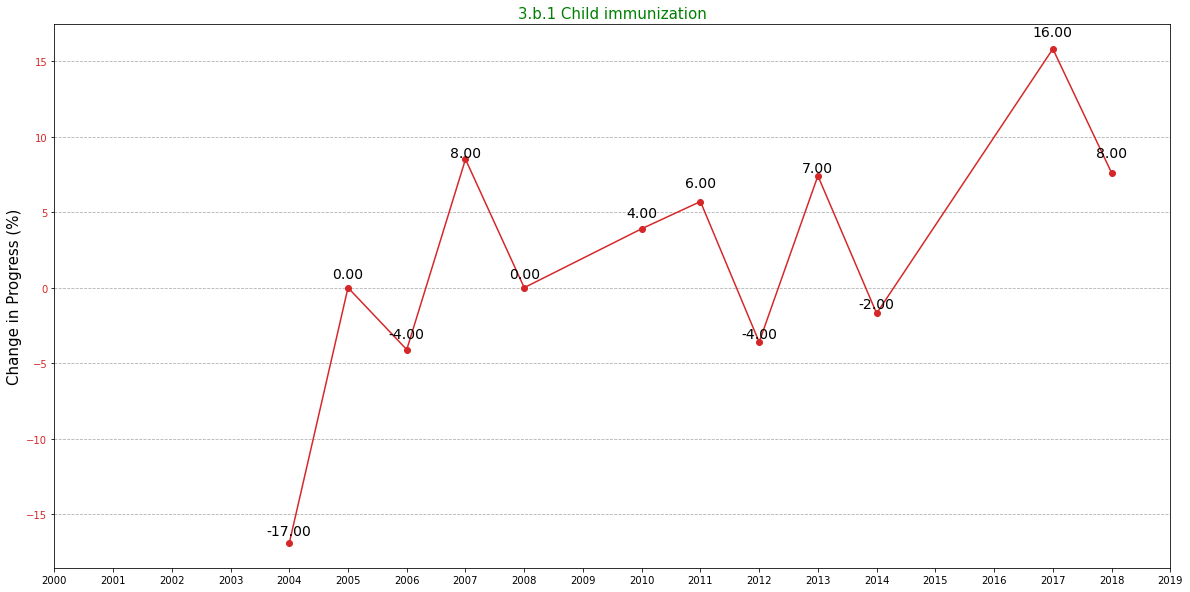

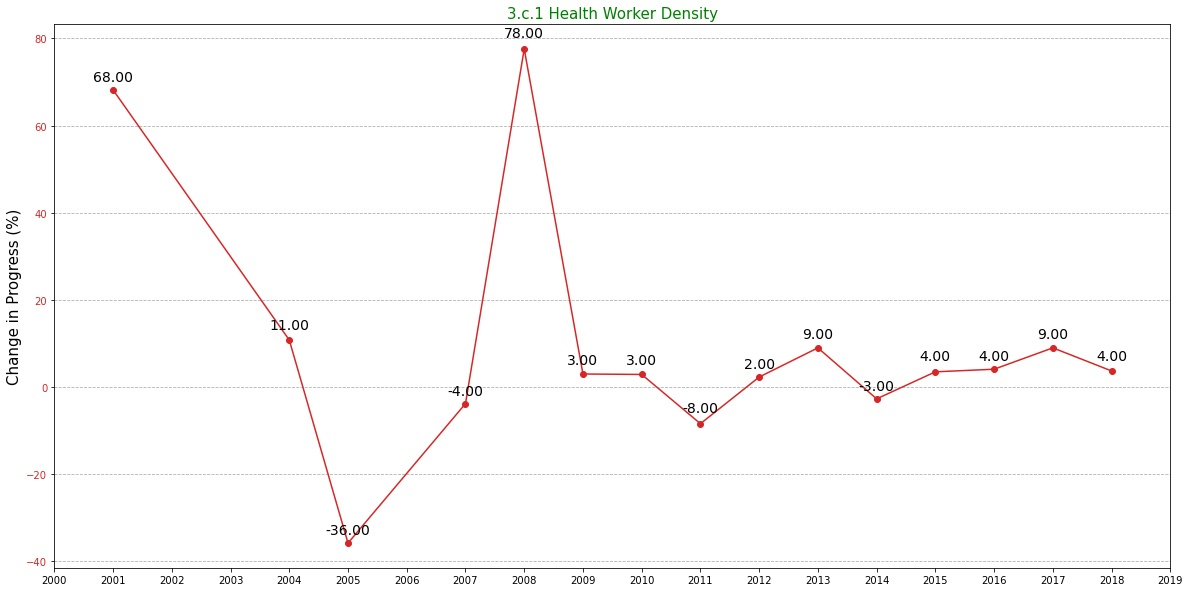

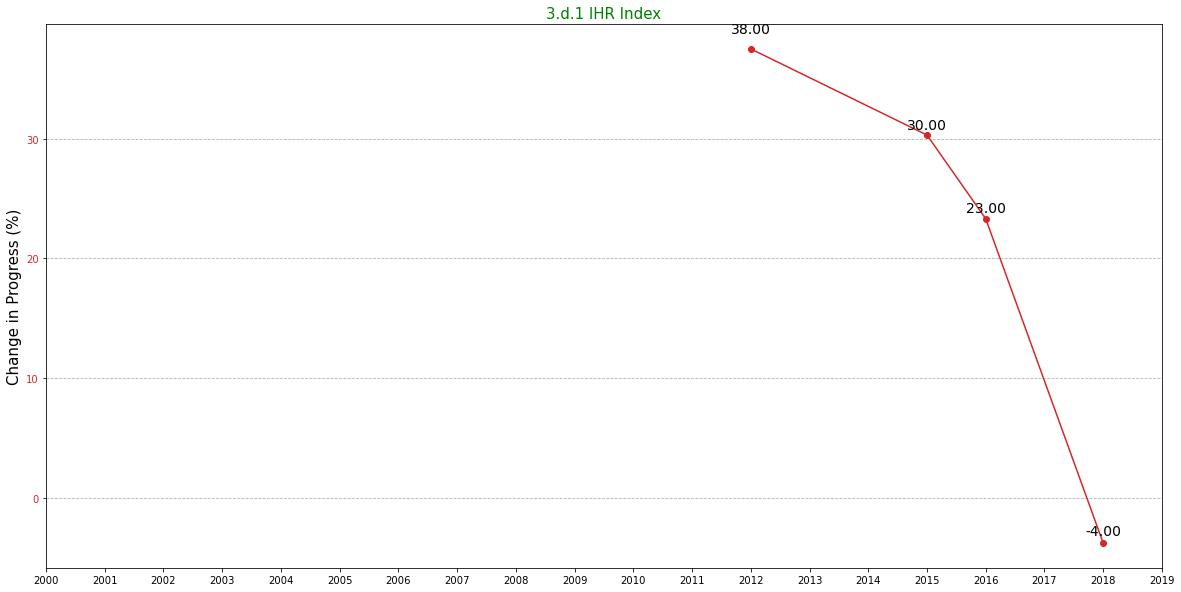

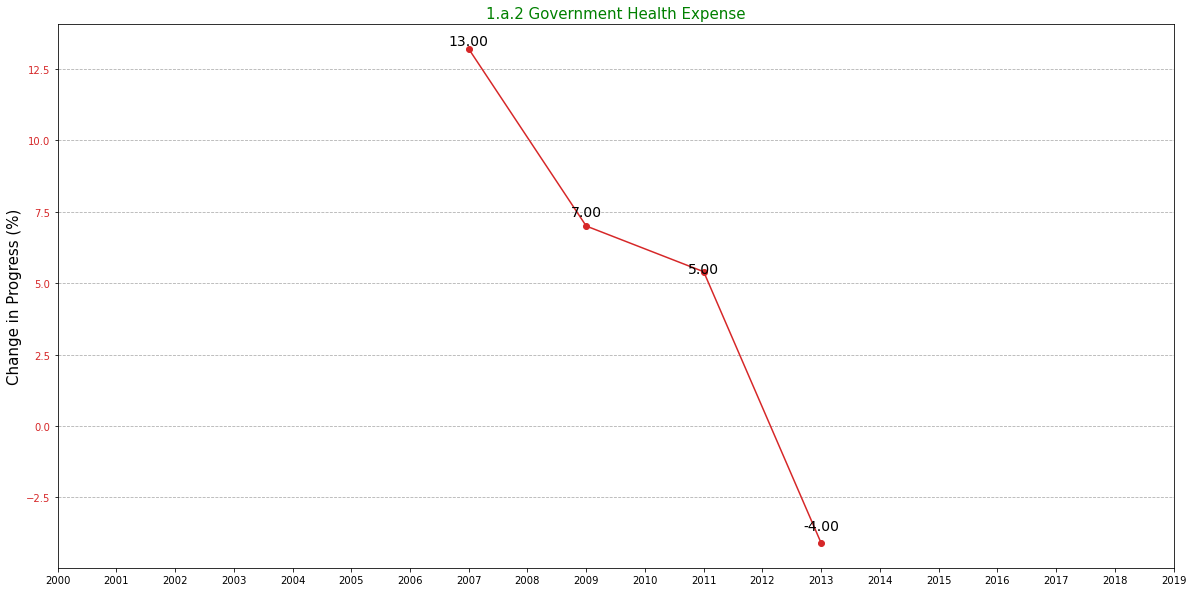

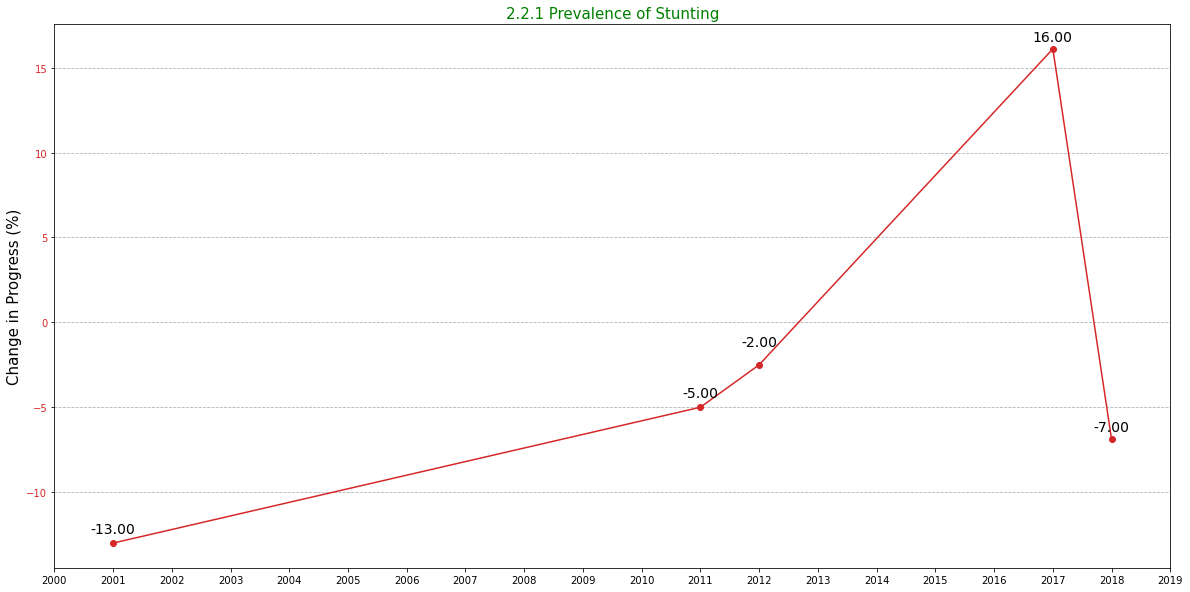

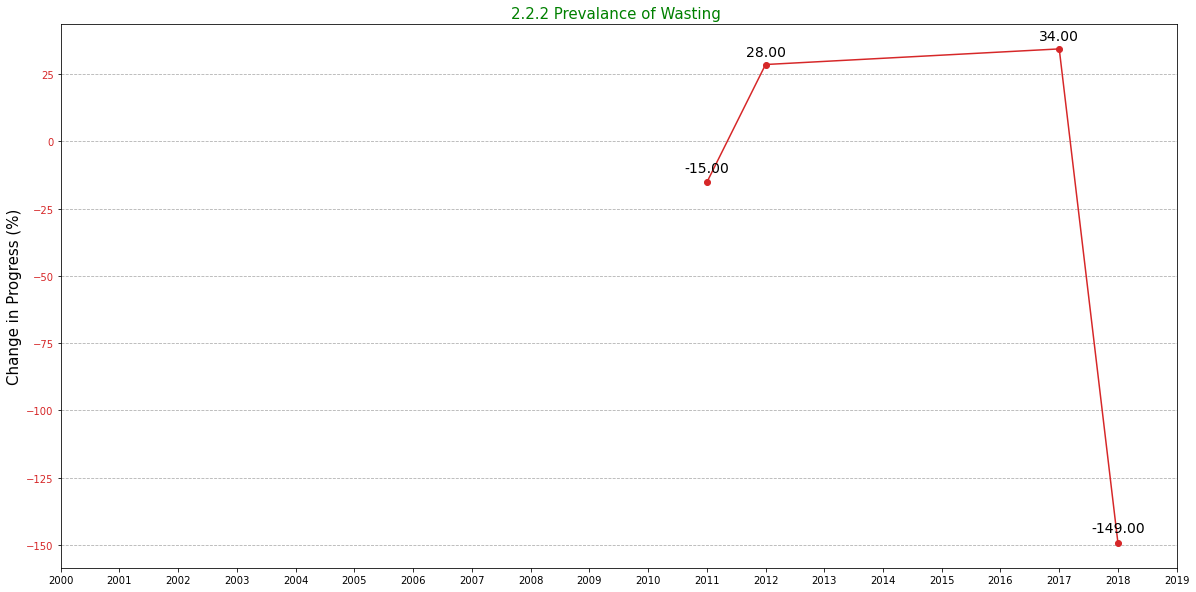

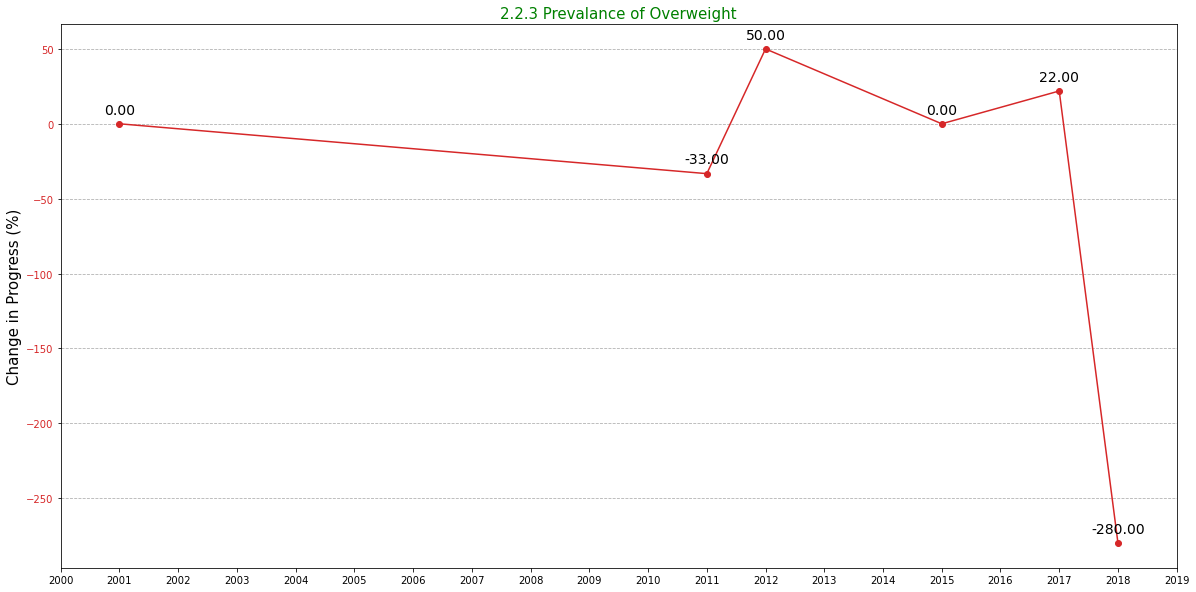

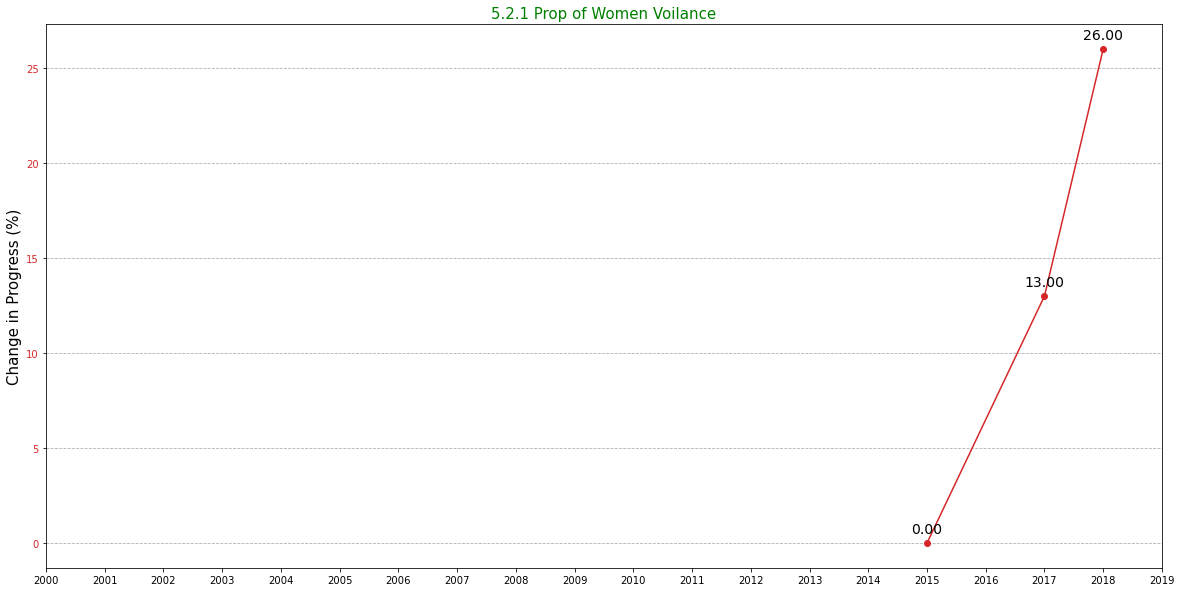

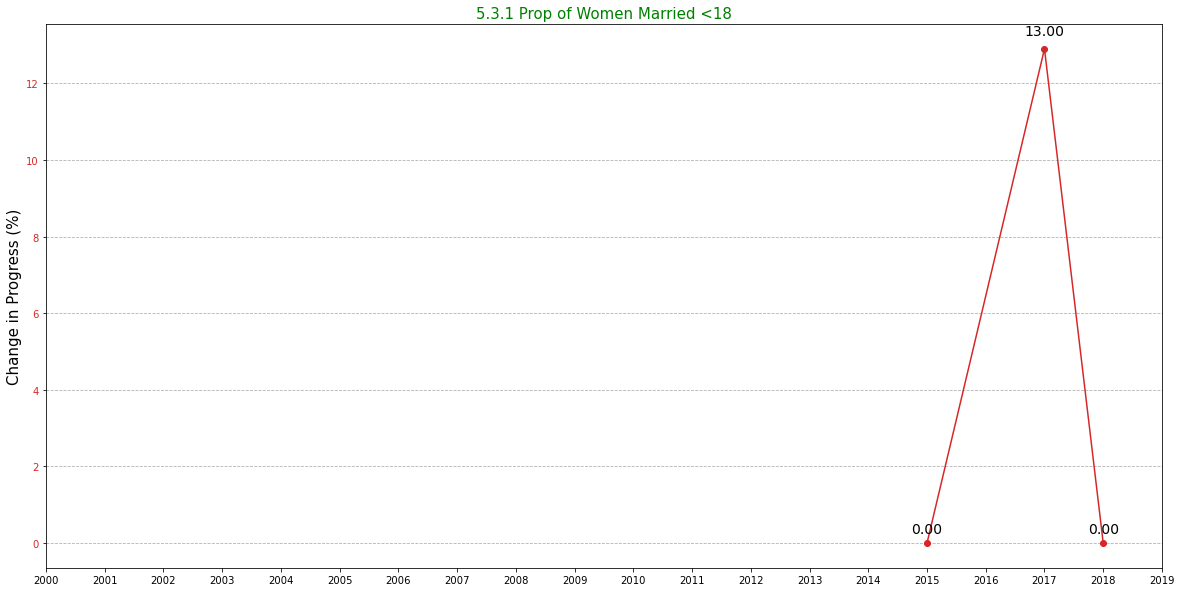

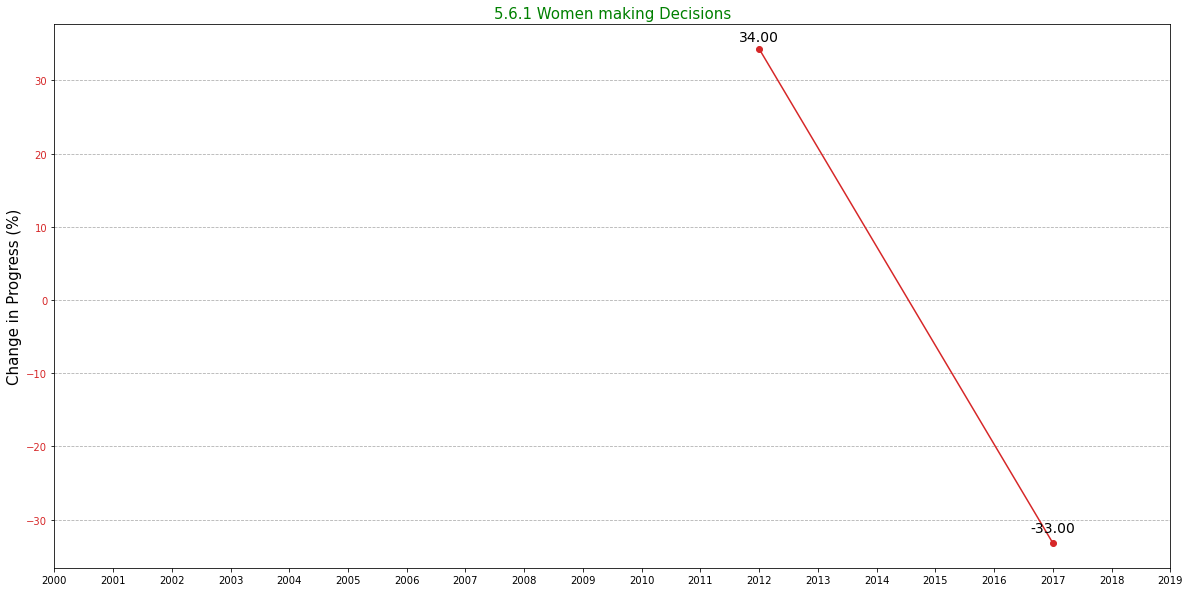

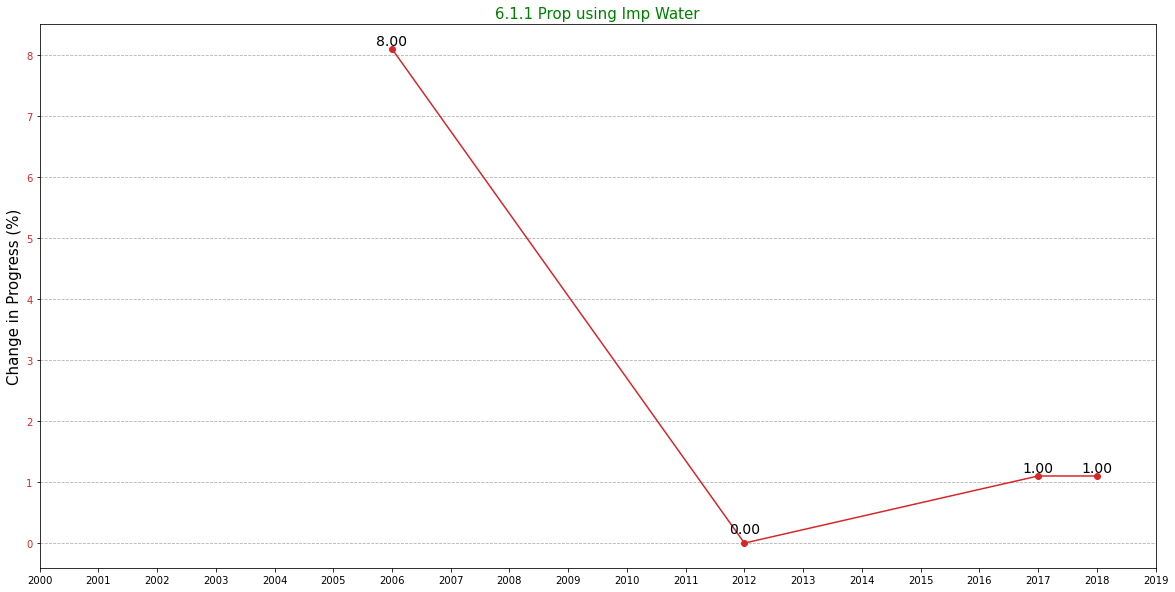

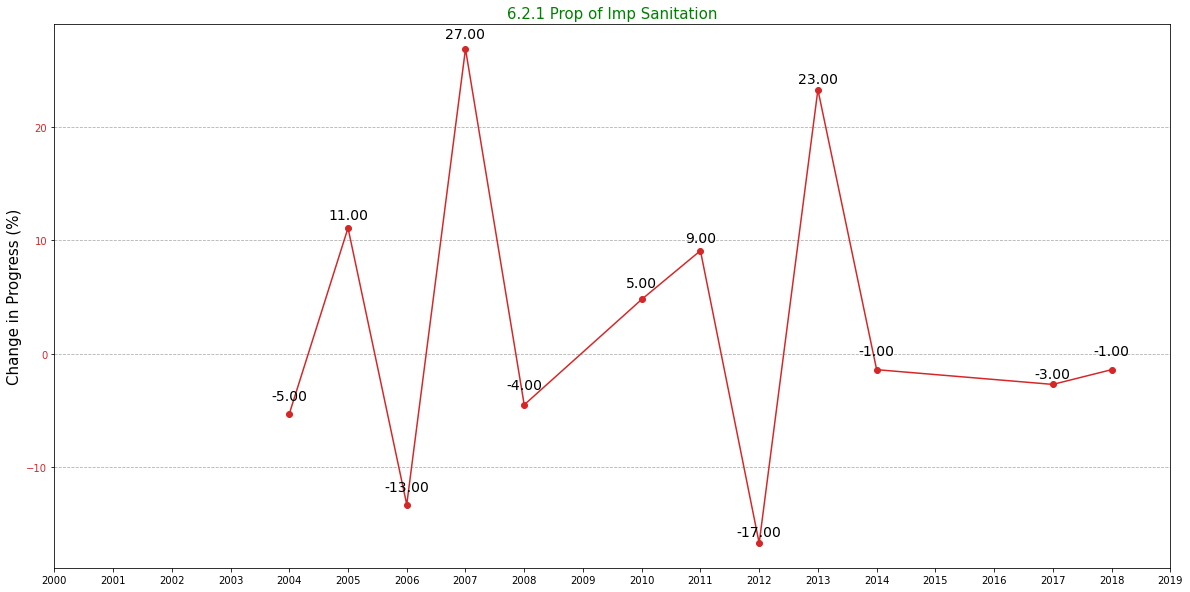

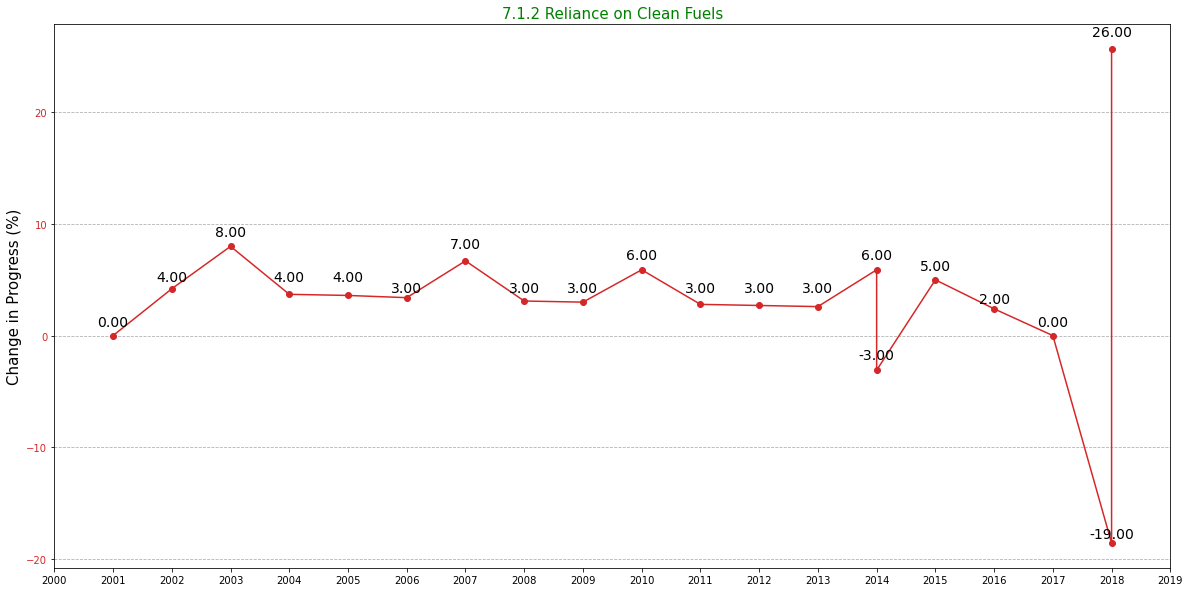

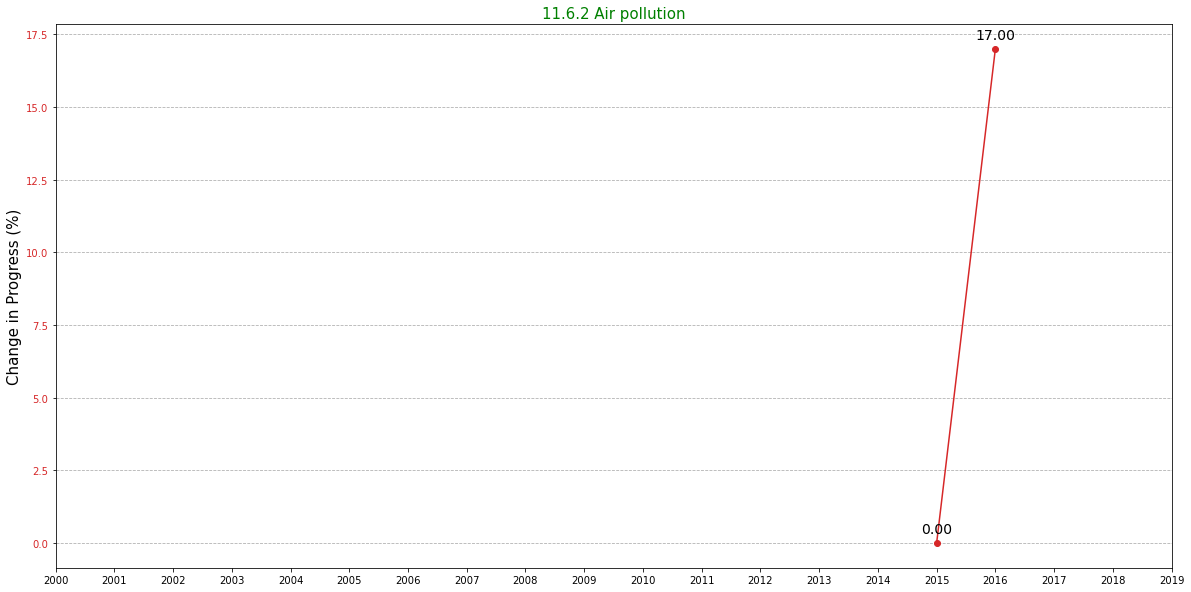

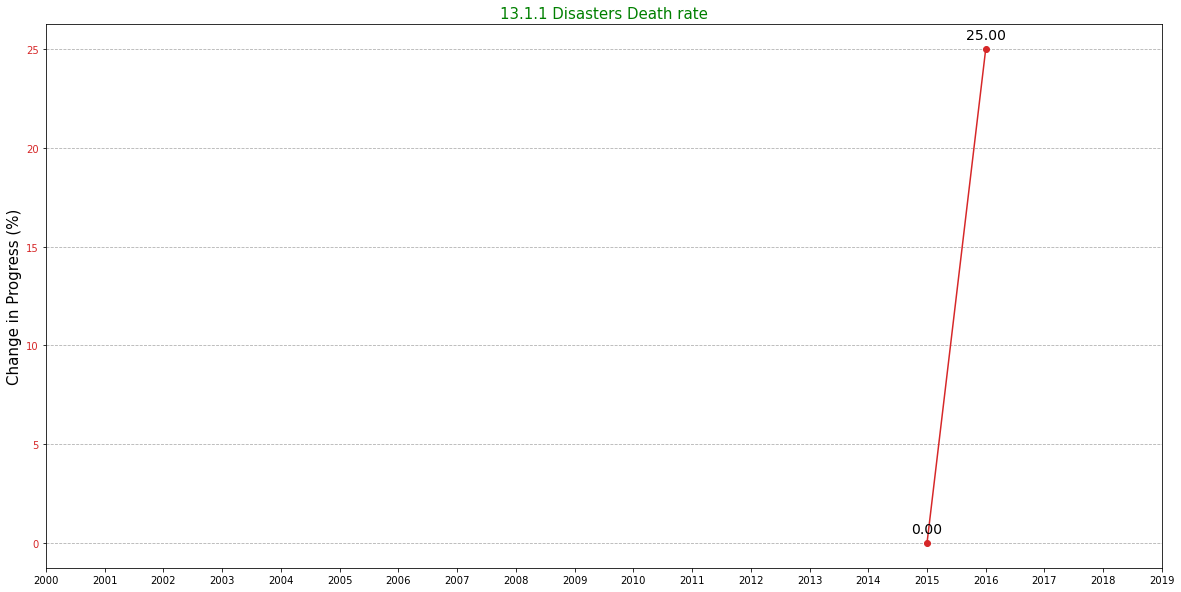

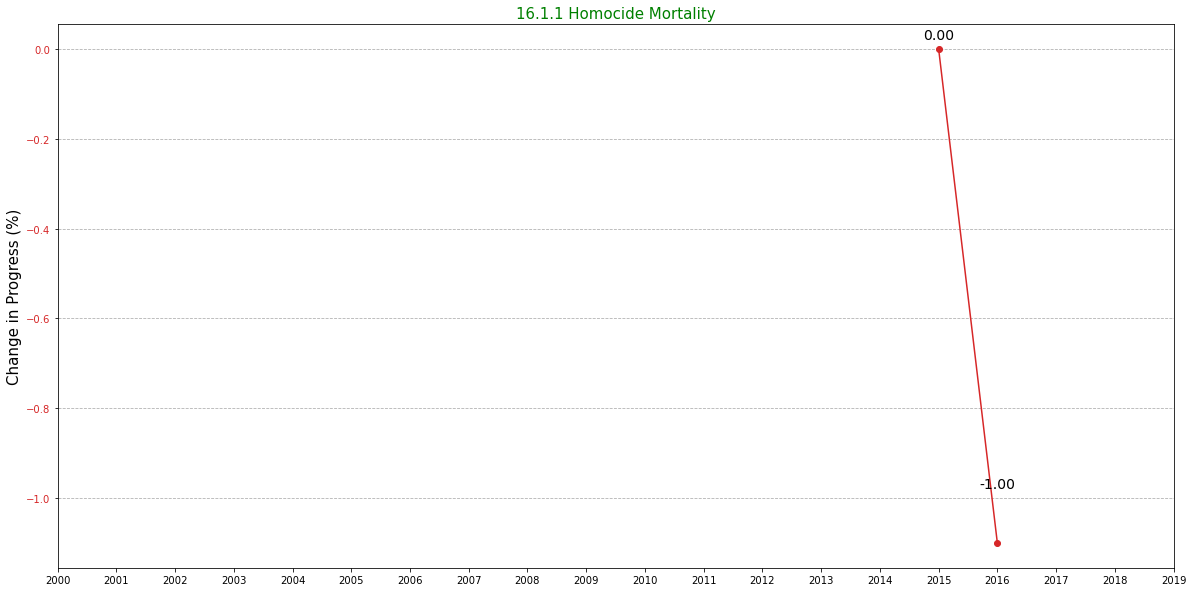

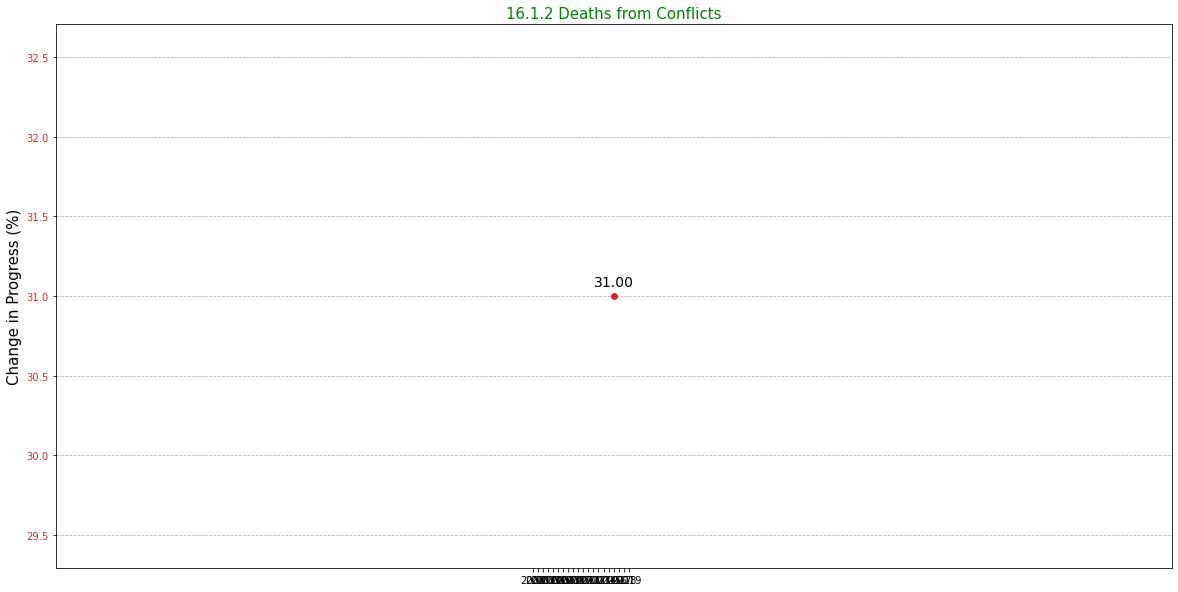

In [10]:
import pandas as pd
import matplotlib.pyplot as plt2
import seaborn as sb

#file2 = pd.read_excel('E:/dashboards/sdg3/pct_change.xlsx', sheet_name=None)

file2 = pd.ExcelFile('E:/dashboards/sdg3/pct_change_all.xlsx')

for sheet_name in file2.sheet_names:
 
    file2 = pd.read_excel('E:/dashboards/sdg3/pct_change_all.xlsx', sheet_name=sheet_name)
    df2= pd.DataFrame(file2).reset_index(drop='True')

    
    #print(df2['Progress'].iloc[0], df2['Progress'].iloc[-1])
    
    if (df2['Progress'].iloc[0] > df2['Progress'].iloc[-1]):
        df2['pct_change'] = pct_change_dec(df2['Progress'])
    else:
        df2['pct_change'] = pct_change_inc(df2['Progress'])

    #print(df2[0:-1])

    df2 = df2[1:-1]    
    df2.fillna(0)
    print(sheet_name)
    print(df2)
    fig, ax2 = plt2.subplots(figsize=(20, 10))
    color = 'tab:red'
    ax2.set_ylabel('Change in Progress (%)', color='black' , size=15)  # we already handled the x-label with ax1
    bar2 = ax2.plot(df2['Year'], df2['pct_change'], color=color, marker='o')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_title(sheet_name, color='green', size=15)
    ax2.set_xticks([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014, 2015,2016,2017,2018,2019])
    autolabel_line(df2['Year'], df2['pct_change'].round())

    plt.grid(axis='y', which = 'major', linestyle='--')

In [11]:
# import pandas as pd
# import matplotlib.pyplot as plt2
# import seaborn as sb

# #file2 = pd.read_excel('E:/dashboards/sdg3/pct_change.xlsx', sheet_name=None)

# file2 = pd.ExcelFile('E:/dashboards/sdg3/pct_change_province.xlsx')

# for sheet_name in file2.sheet_names:
 
#     file2 = pd.read_excel('E:/dashboards/sdg3/pct_change_province.xlsx', sheet_name=sheet_name)
#     df2= pd.DataFrame(file2).reset_index(drop='True')

#     df2.fillna(0)
#     #print(df2['Progress'].iloc[0], df2['Progress'].iloc[-1])
    
#     if (df2['Punjab'].iloc[0] > df2['Punjab'].iloc[-1]):
#         df2['pct_change_punjab'] = pct_change_dec(df2['Punjab'])
#         df2['pct_change_sindh'] = pct_change_dec(df2['Sindh'])
# #             df2['pct_change_kpk'] = pct_change_dec(df2['Kpk'])
# #             df2['pct_change_bal'] = pct_change_dec(df2['Balochistan'])
# #             df2['pct_change_ict'] = pct_change_dec(df2['ICT'])
# #             df2['pct_change_gb'] = pct_change_dec(df2['GB'])
# #             df2['pct_change_ajk'] = pct_change_dec(df2['AJK'])
#     else:
#         df2['pct_change_punjab'] = pct_change_inc(df2['Punjab'])
#         df2['pct_change_sindh'] = pct_change_inc(df2['Sindh'])
# #         df2['pct_change_kpk'] = pct_change_inc(df2['Kpk'])
# #         df2['pct_change_bal'] = pct_change_inc(df2['Balochistan'])
# #         df2['pct_change_ict'] = pct_change_inc(df2['ICT'])
# #         df2['pct_change_gb'] = pct_change_inc(df2['GB'])
# #         df2['pct_change_ajk'] = pct_change_inc(df2['AJK'])


#     #print(df2[0:-1])

#     df2 = df2[1:-1]    
#     df2.fillna(0)
#     df2
#     print(sheet_name)
#     print(df2)
    
#     fig, ax2 = plt2.subplots(figsize=(20, 10))
#     color = ["tab:green","tab:olive","tab:brown","tab:red","tab:blue","tab:cyan","tab:purple","tab:orange","tab:pink"]
#     #color = 'green'   
#     ax2.set_ylabel('Change in Progress (%)', color='black' , size=15)  # we already handled the x-label with ax1
    
#     plot1 = ax2.plot(df2['Year'], df2['pct_change_punjab'], color=color[0], marker='o')
#     plot2 = ax2.plot(df2['Year'], df2['pct_change_sindh'], color=color[1], marker='D')
# #     plot3 = ax2.plot(df2['Year'], df2['pct_change_kpk'], color=color[2], marker='8')
# #     plot4 = ax2.plot(df2['Year'], df2['pct_change_bal'], color=color[3], marker='s')
# #     plot5 = ax2.plot(df2['Year'], df2['pct_change_gb'], color=color[4], marker='*')
# #     plot6 = ax2.plot(df2['Year'], df2['pct_change_ict'], color=color[5], marker='d')
# #     plot7 = ax2.plot(df2['Year'], df2['pct_change_ajk'], color=color[6], marker='p')
    
#     ax2.tick_params(axis='y', labelcolor=color[3])
#     ax2.set_title(sheet_name, color=color[7], size=15)
#     ax2.set_xticks([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014, 2015,2016,2017,2018,2019])
   
#     autolabel_line(df2['Year'], df2['pct_change_punjab'].round())
#     autolabel_line(df2['Year'], df2['pct_change_sindh'].round())
# #     autolabel_line(df2['Year'], df2['pct_change_bal'].round())
# #     autolabel_line(df2['Year'], df2['pct_change_kpk'].round())
# #     autolabel_line(df2['Year'], df2['pct_change_ajk'].round())
# #     autolabel_line(df2['Year'], df2['pct_change_gb'].round())
# #     autolabel_line(df2['Year'], df2['pct_change_ict'].round())
    
#     plt2.legend(['Punjab', 'Sindh','Kpk', 'Balochistan','GB','ICT','AJK'], loc='upper left')
    
#     plt2.grid(axis='y', which = 'major', linestyle='--')

3.1.1 Punjab
   Year  Progress  pct_change
1  2006       227        20.6
2  2017       180        20.7
3  2019       157        12.8
3.1.1 Sindh
   Year  Progress  pct_change
1  2006       314        -9.8
2  2019       224        28.7
3.1.1 Bal
   Year  Progress  pct_change
1  2006       785      -174.5
2  2019       298        62.0
3.1.1 Kpk
   Year  Progress  pct_change
1  2006       275         3.8
2  2019       165        40.0
3.1.1 AJK
   Year  Progress  pct_change
1  2019       104        63.6
3.1.1 GB
   Year  Progress  pct_change
1  2019       157        45.1
3.1.2 ICT
   Year  Progress  pct_change
1  2004        70       204.3
2  2008        85        21.4
3  2010        73       -14.1
4  2012        88        20.5
5  2014        90         2.3
6  2017        87        -3.3
3.1.2 Punjab
   Year  Progress  pct_change
1  2003        33        43.5
2  2004        33         0.0
3  2006        38        15.2
4  2008        43        13.2
5  2010        44         2.3
6  2011      

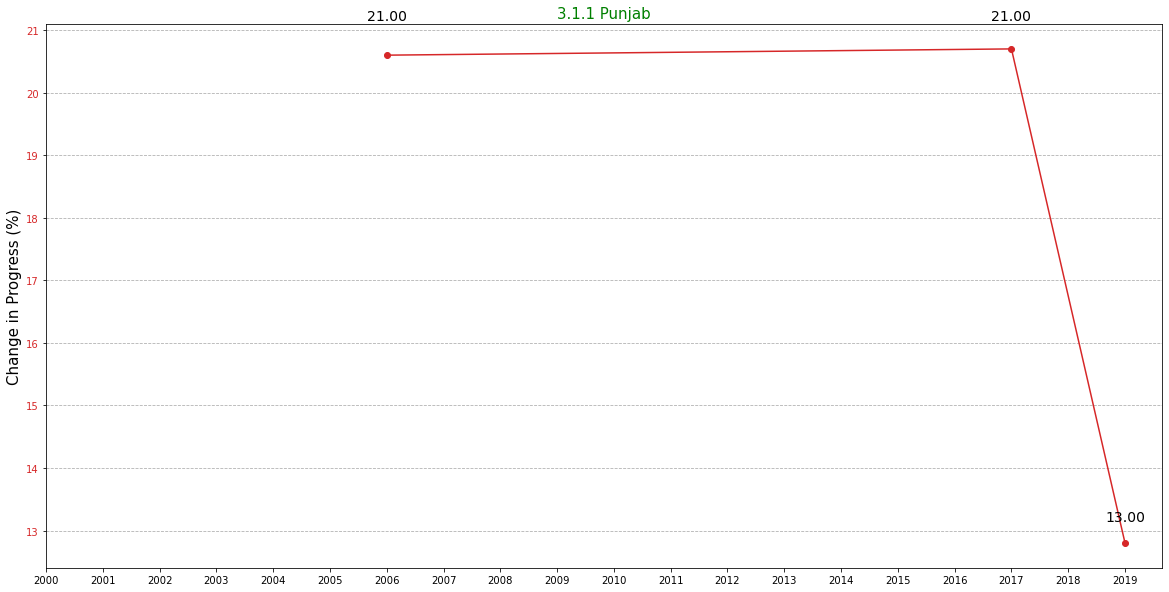

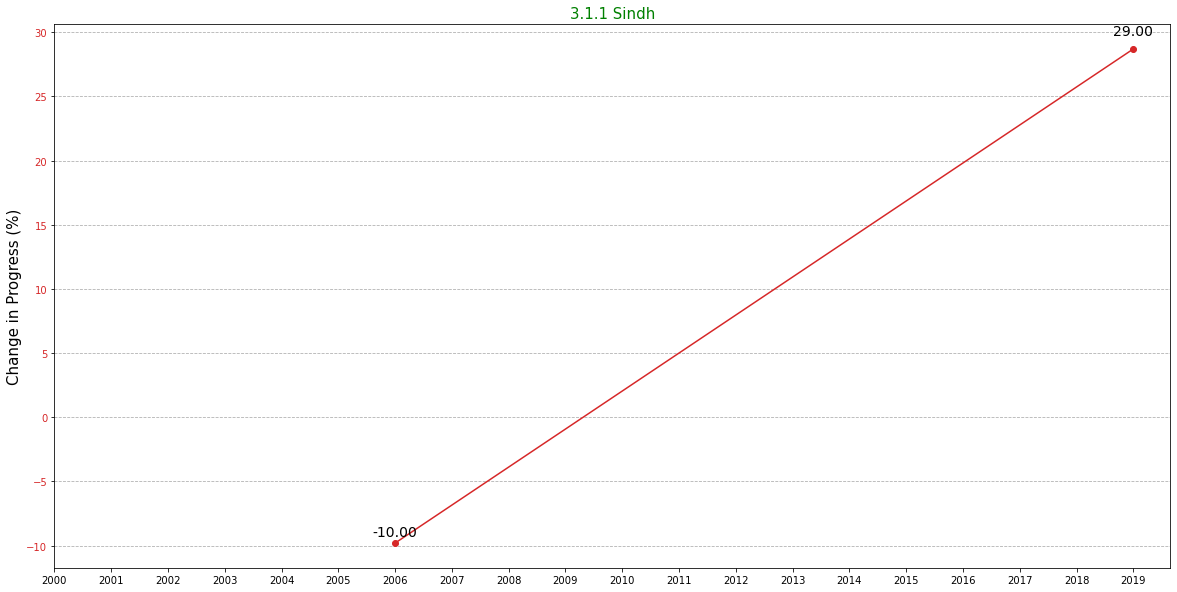

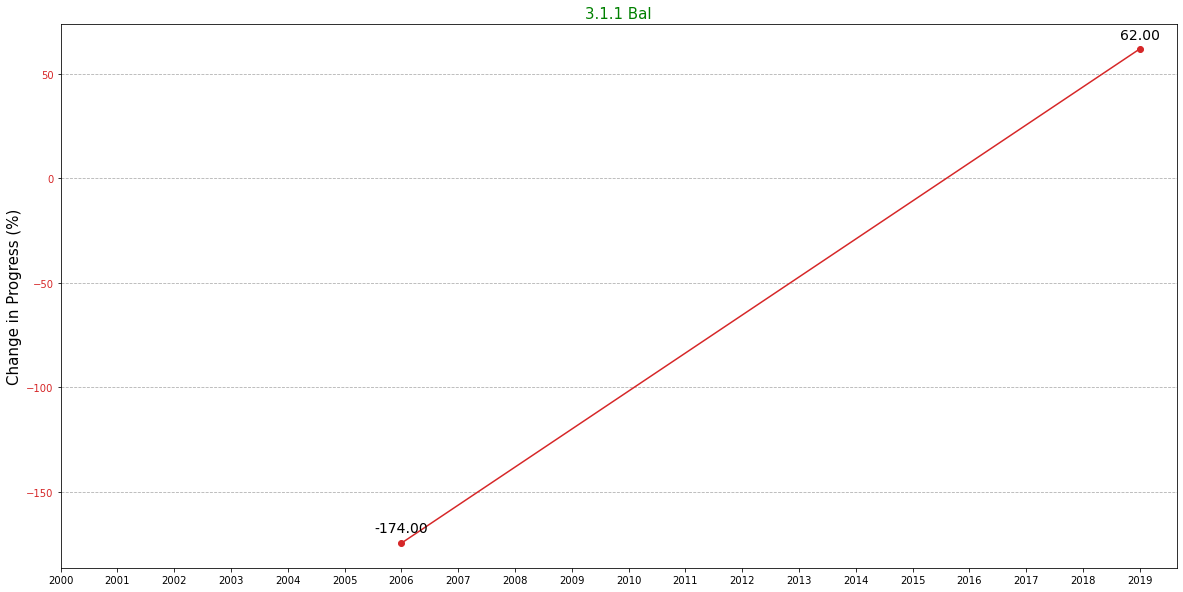

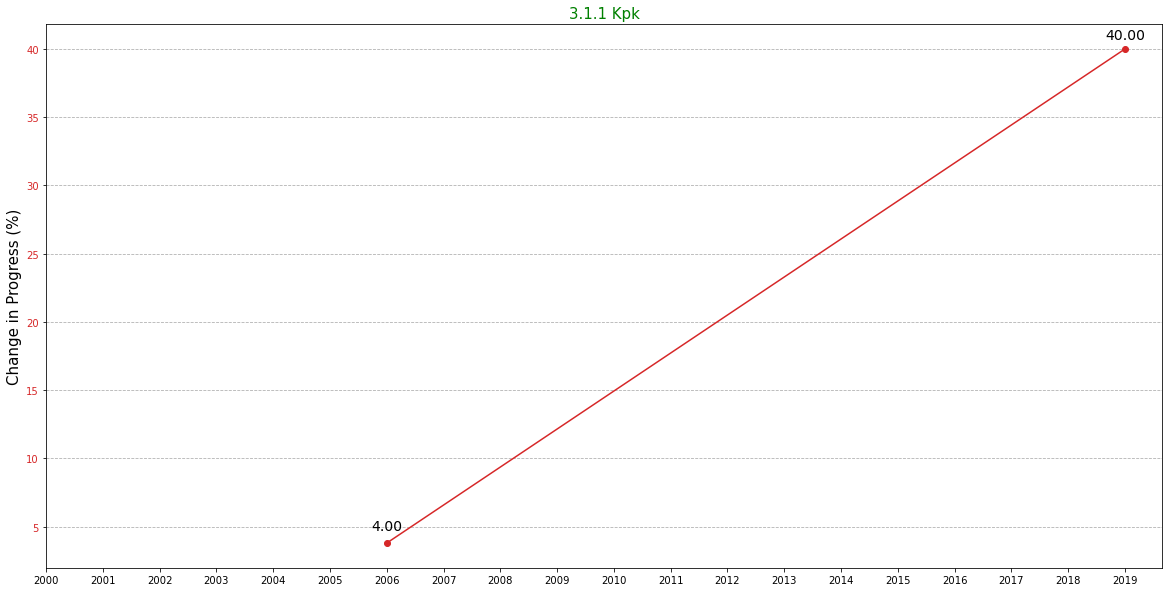

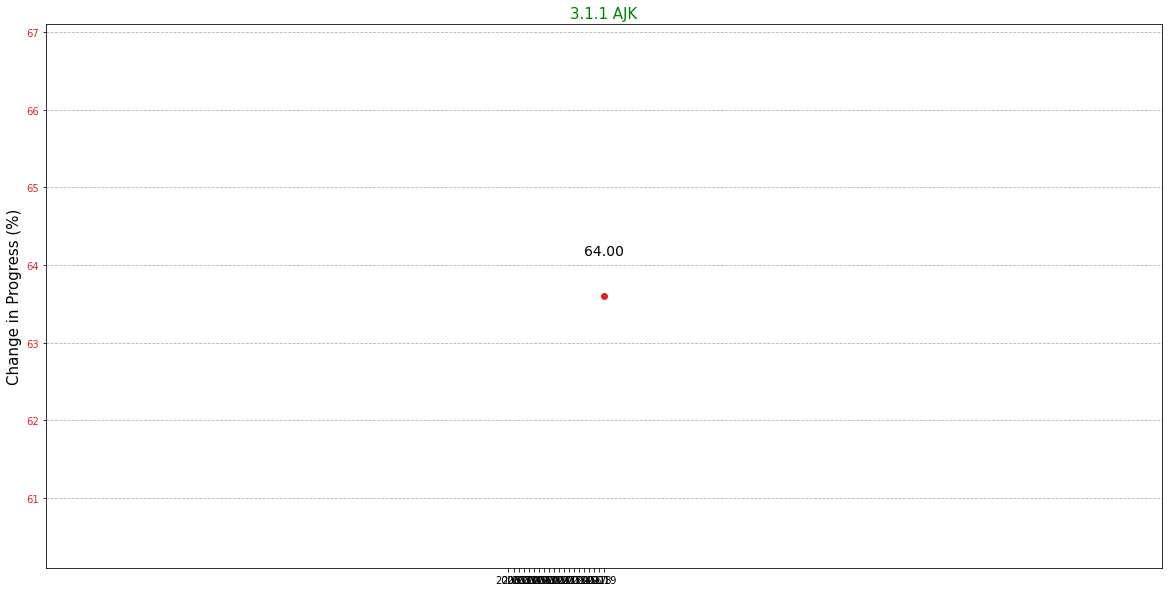

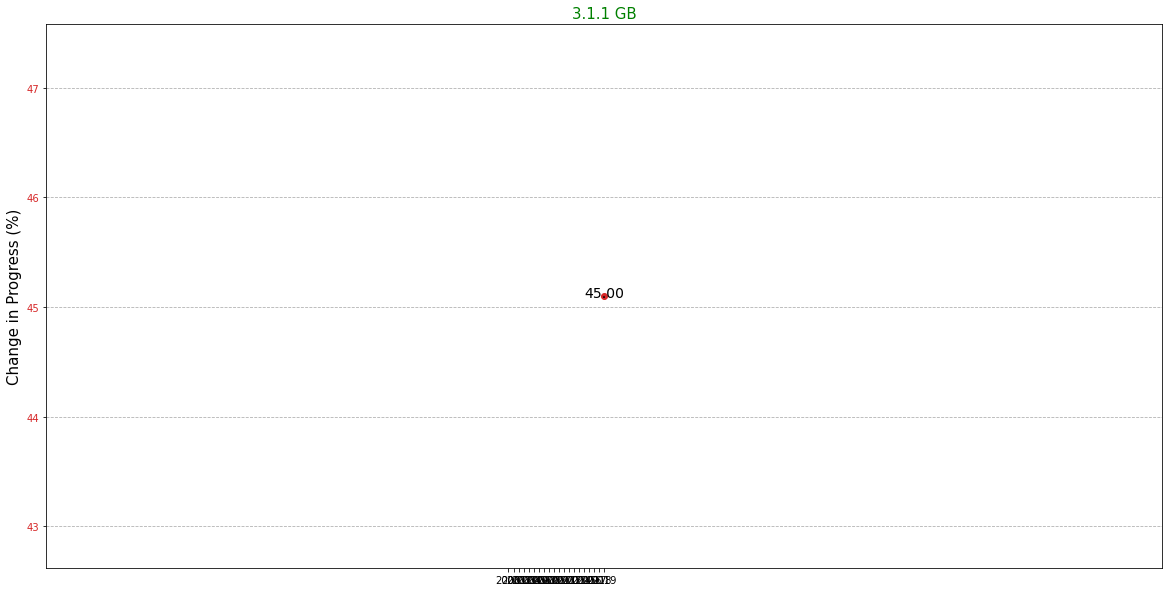

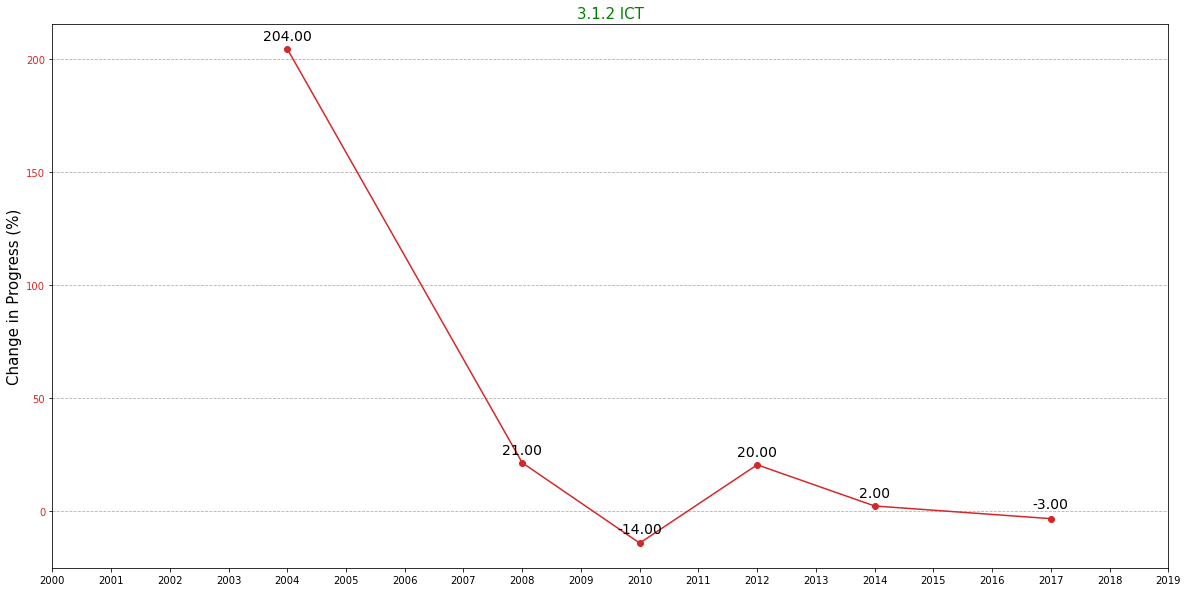

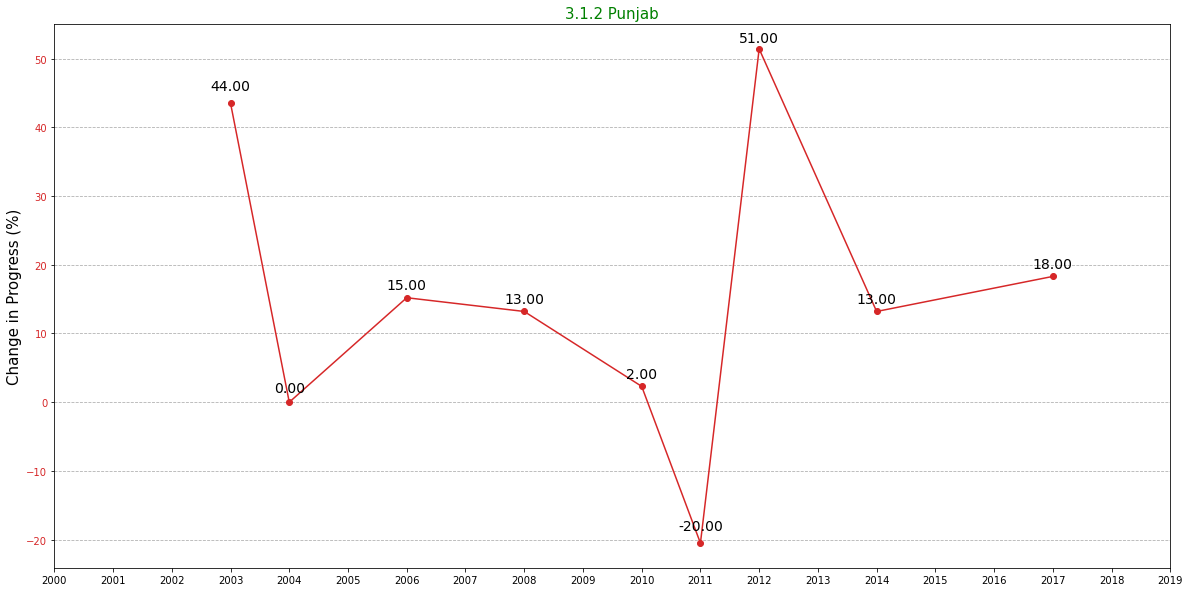

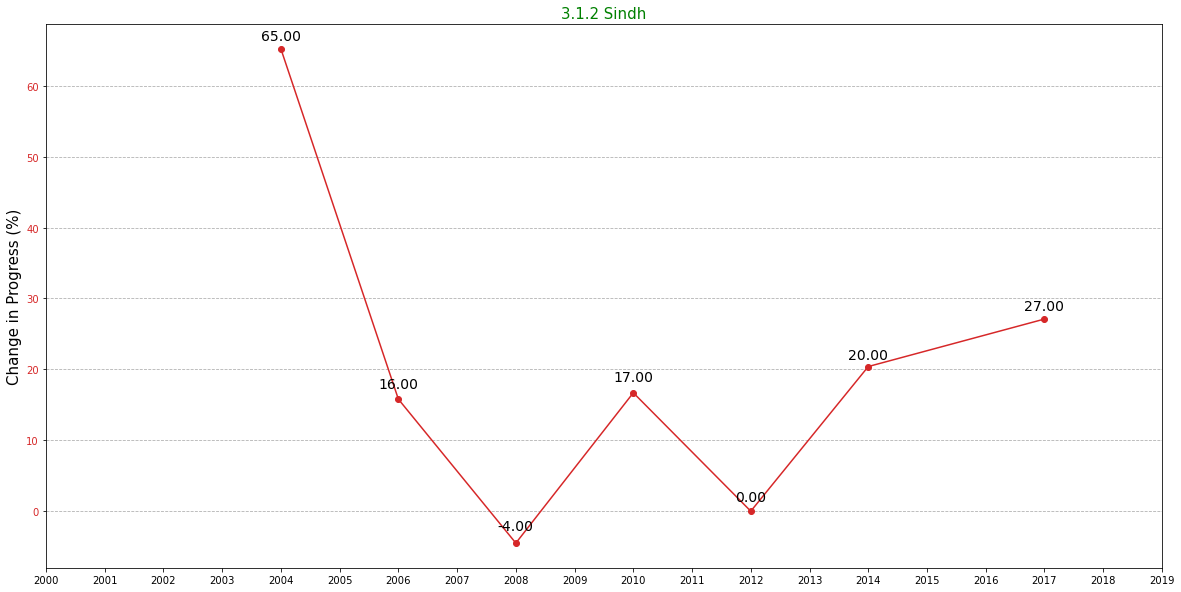

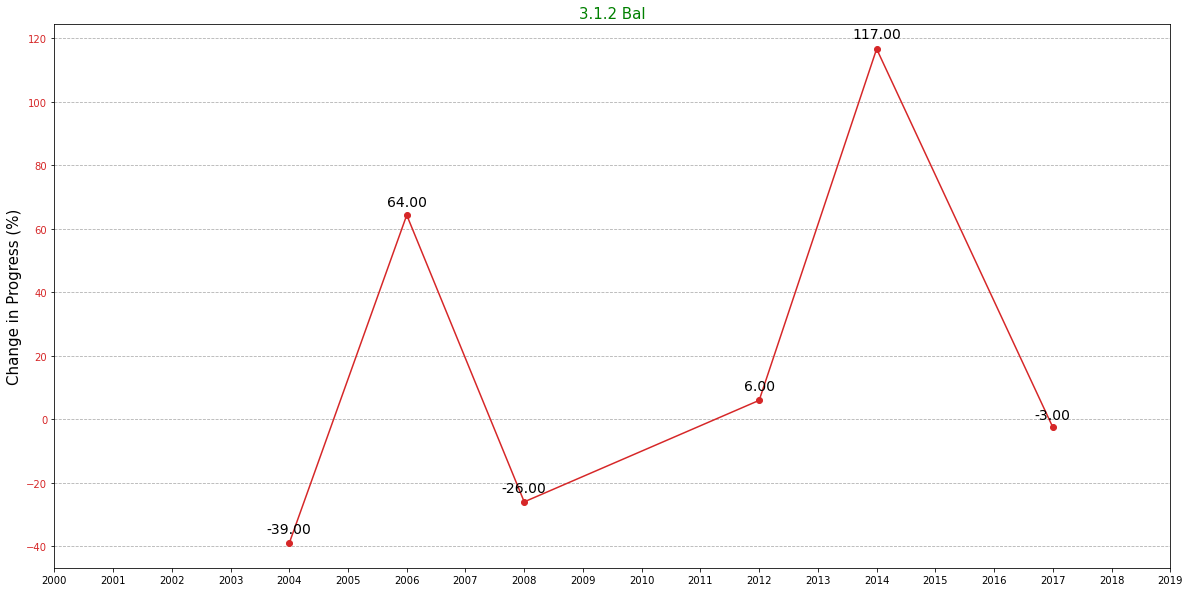

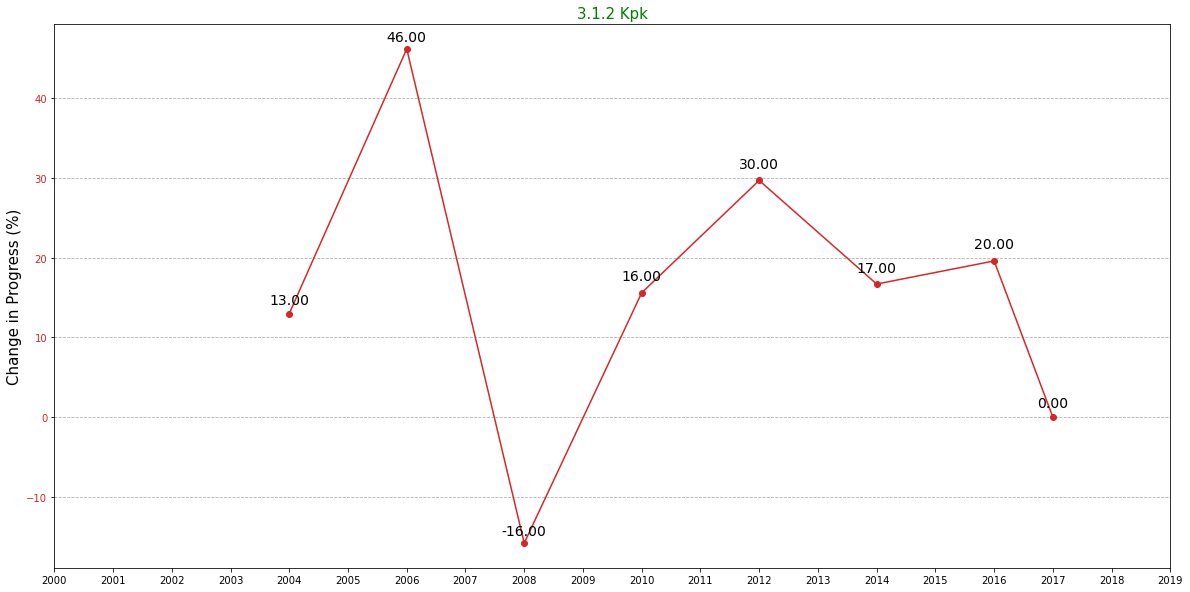

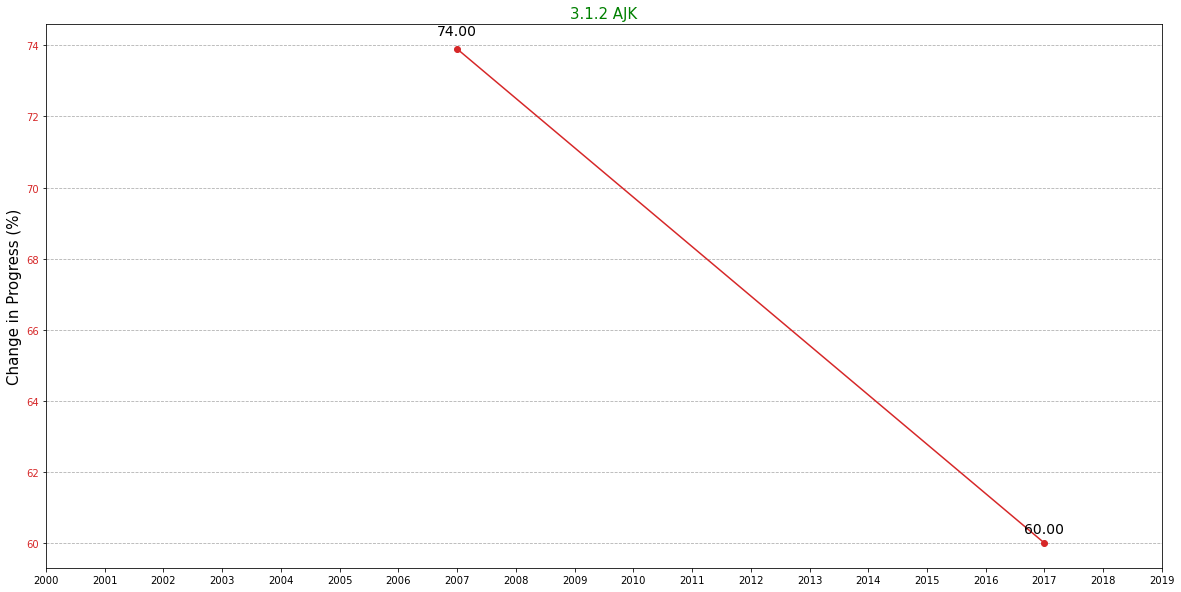

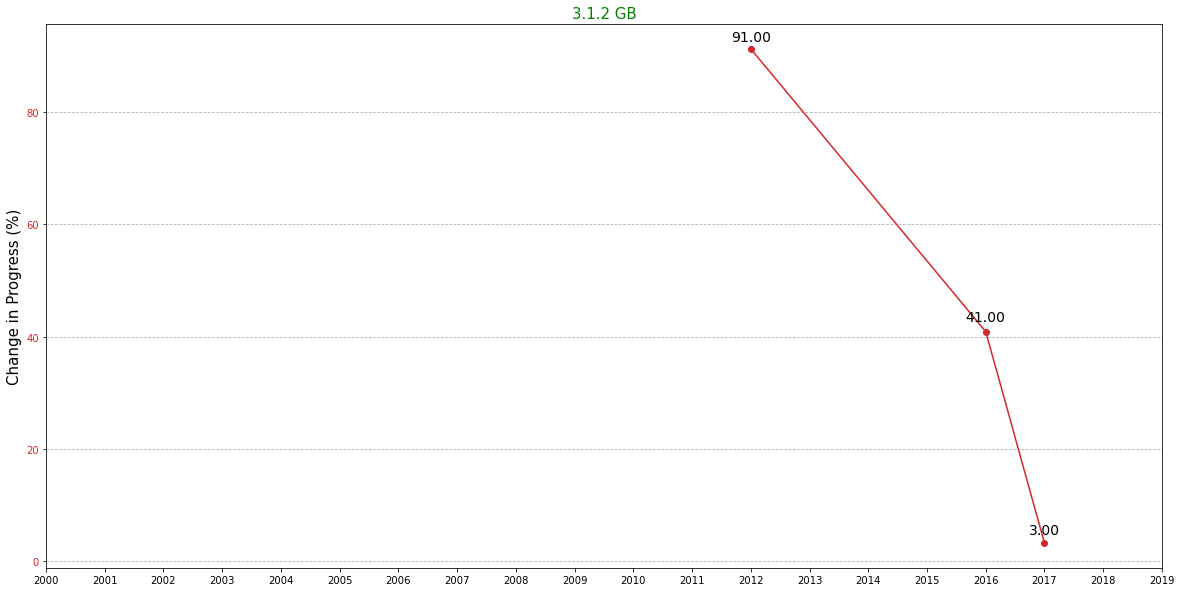

In [12]:
import pandas as pd
import matplotlib.pyplot as plt2
import seaborn as sb

#file2 = pd.read_excel('E:/dashboards/sdg3/pct_change.xlsx', sheet_name=None)

file2 = pd.ExcelFile('E:/dashboards/sdg3/pct_change_province.xlsx')

for sheet_name in file2.sheet_names:
 
    file2 = pd.read_excel('E:/dashboards/sdg3/pct_change_province.xlsx', sheet_name=sheet_name)
    df2= pd.DataFrame(file2).reset_index(drop='True')

    
    #print(df2['Progress'].iloc[0], df2['Progress'].iloc[-1])
    
    if (df2['Progress'].iloc[0] > df2['Progress'].iloc[-1]):
        df2['pct_change'] = pct_change_dec(df2['Progress'])
    else:
        df2['pct_change'] = pct_change_inc(df2['Progress'])

    #print(df2[0:-1])

    df2 = df2[1:-1]    
    df2.fillna(0)
    print(sheet_name)
    print(df2)
    fig, ax2 = plt2.subplots(figsize=(20, 10))
    color = 'tab:red'
    ax2.set_ylabel('Change in Progress (%)', color='black' , size=15)  # we already handled the x-label with ax1
    bar2 = ax2.plot(df2['Year'], df2['pct_change'], color=color, marker='o')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_title(sheet_name, color='green', size=15)
    ax2.set_xticks([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014, 2015,2016,2017,2018,2019])
    autolabel_line(df2['Year'], df2['pct_change'].round())

    plt.grid(axis='y', which = 'major', linestyle='--')